## **CUDA SETUP**

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2021-12-19 13:47:08--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2021-12-19 13:47:08--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?H50WLliUBKHEpS3BDNdn85qPe9iwLaUCk85rsN21Vo7exrxcYsqyqPTgWsUMYeVsoJqUn-egpsDreHTUv-0x41EGATBhTpdiUm_QvQKRqK3sF

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-9lnucq65
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-9lnucq65
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4305 sha256=e3869ea925e3194aff4fd7edbd62ea0d291e023513db90c6b73a1d2a46dadc88
  Stored in directory: /tmp/pip-ephem-wheel-cache-jozgyzqg/wheels/c5/2b/c0/87008e795a14bbcdfc7c846a00d06981916331eb980b6c8bdf
Successfully built NVCCPlugin


In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


## **IRIS DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

In [ ]:
iris_df = pd.read_csv("Iris.csv").drop('Id', axis=1)

In [ ]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris_df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


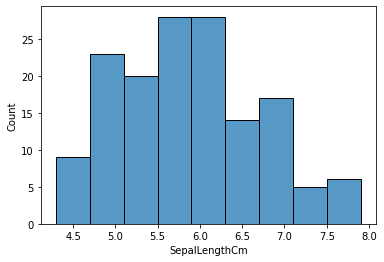

In [ ]:
sns.histplot(data=iris_df, x = 'SepalLengthCm')

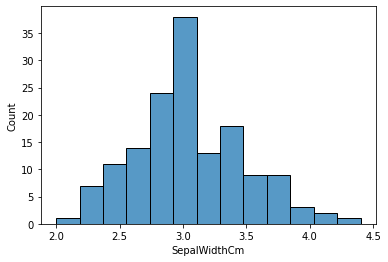

In [ ]:
sns.histplot(data=iris_df, x = 'SepalWidthCm')

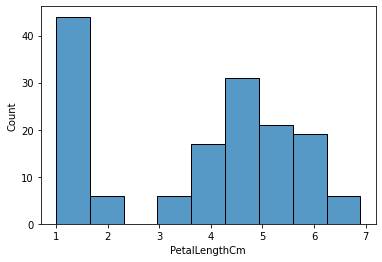

In [ ]:
sns.histplot(data=iris_df, x = 'PetalLengthCm')

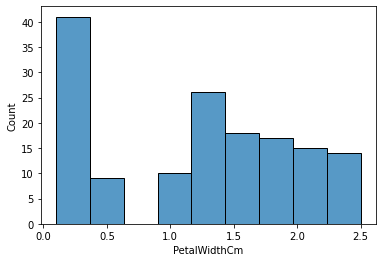

In [ ]:
sns.histplot(data=iris_df, x = 'PetalWidthCm')

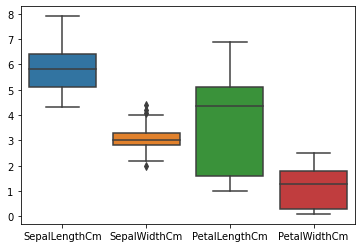

In [ ]:
sns.boxplot(data=iris_df)

## **COMPUTE MIN, MAX, SUM, AVERAGE, STD. DEVIATION**



### **MIN, MAX  CUDA**

In [ ]:
%%cu
#include <iostream>
#include <cstdio>
#include <cstdlib>
#include <cuda_runtime.h>
#include <time.h>
#include <chrono>
using namespace std;


__global__ void getMinGPU(int *arr, int N, int mul, int offset) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    int i = mul * idx, j = i + offset;
    if(j < N) if(arr[i] > arr[j]) arr[i] = arr[j];
}

void minimumGPU(int *arr, int n, int *ans) {
    int mul = 2, offset = 1, N = n;
    while(n > 1) {
        n = (n + 1) / 2;
        int blocks = (n-1) / 256 + 1;
        int threads = 256;
        getMinGPU<<<blocks, threads>>>(arr, N, mul, offset);
        mul *= 2;
        offset *= 2;
    }
    cudaMemcpy(ans, arr, sizeof(int), cudaMemcpyDeviceToHost);
}

void minimumCPU(int *arr, int n, int *ans) {
    *ans = INT_MAX;
    for(int i = 0; i < n; i++) {
        if(arr[i] < (*ans)) {
            (*ans) = arr[i];
        }
    }
}

__global__ void getMaxGPU(int *arr, int N, int mul, int offset) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    int i = mul * idx, j = i + offset;
    if(j < N) if(arr[i] < arr[j]) arr[i] = arr[j];
}

void maximumGPU(int *arr, int n, int *ans) {
    int mul = 2, offset = 1, N = n;
    while(n > 1) {
        n = (n + 1) / 2;
        int blocks = (n-1) / 256 + 1;
        int threads = 256;
        getMaxGPU<<<blocks, threads>>>(arr, N, mul, offset);
        mul *= 2;
        offset *= 2;
    }
    cudaMemcpy(ans, arr, sizeof(int), cudaMemcpyDeviceToHost);
}

void maximumCPU(int *arr, int n, int *ans) {
    *ans = INT_MIN;
    for(int i = 0; i < n; i++) {
        if(arr[i] > (*ans)) {
            (*ans) = arr[i];
        }
    }
}

int main() {
    srand(time(0));
    int N = (1<<20);
    int *h_array, *d_array;
    
    h_array = new int[N];
    cudaMalloc((void**)&d_array, N * sizeof(int));

    for(int i = 0; i < N; i++) h_array[i] = rand();
    cudaMemcpy(d_array, h_array, N * sizeof(int), cudaMemcpyHostToDevice);

    int *ans_CPU, *ans_GPU;
    ans_CPU = new int;
    ans_GPU = new int;

    auto start = chrono::steady_clock::now();
    minimumCPU(h_array, N, ans_CPU);
    auto end = chrono::steady_clock::now();

    cout << "CPU STATISTICS:\n";
    cout << "Minimum value: " << *ans_CPU << '\n';
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    start = chrono::steady_clock::now();
    maximumCPU(h_array, N, ans_CPU);
    end = chrono::steady_clock::now();

    cout << "Maximum value: " << *ans_CPU << '\n';
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n\n";

    start = chrono::steady_clock::now();
    minimumGPU(d_array, N, ans_GPU);
    end = chrono::steady_clock::now();

    cout << "GPU STATISTICS:\n";
    cout << "Minimum value: " << *ans_GPU << '\n';
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    cudaMemcpy(d_array, h_array, N * sizeof(int), cudaMemcpyHostToDevice);

    start = chrono::steady_clock::now();
    maximumGPU(d_array, N, ans_GPU);
    end = chrono::steady_clock::now();

    cout << "Maximum value: " << *ans_GPU << '\n';
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    return 0;
}

CPU STATISTICS:
Minimum value: 1380
Time taken: 2376 microseconds
Maximum value: 2147481382
Time taken: 2374 microseconds

GPU STATISTICS:
Minimum value: 1380
Time taken: 675 microseconds
Maximum value: 2147481382
Time taken: 698 microseconds



### **SUM, AVERAGE, STD. DEVIATION CUDA**

In [ ]:
%%cu
#include <iostream>
#include <cstdio>
#include <cstdlib>
#include <cuda_runtime.h>
#include <time.h>
#include <chrono>
#include <math.h>
using namespace std;


__global__ void getSumGPU(int *arr, int N, int mul, int offset) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    int i = mul * idx, j = i + offset;
    if(j < N) arr[i] += arr[j];
}

__global__ void getStdDevGPU(int *arr, int N, int mean, int mul, int offset) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    int i = mul * idx, j = i + offset;
    if(j < N) arr[i] = (arr[i]-mean)*(arr[i]-mean) + (arr[j]-mean)*(arr[j]-mean);
    else if(i < N) arr[i] = (arr[i]-mean)*(arr[i]-mean);
}

void sumGPU(int *arr, int n, int *ans) {
    int mul = 2, offset = 1, N = n;
    while(n > 1) {
        n = (n + 1) / 2;
        int blocks = (n-1) / 256 + 1;
        int threads = 256;
        getSumGPU<<<blocks, threads>>>(arr, N, mul, offset);
        mul *= 2;
        offset *= 2;
    }
    cudaMemcpy(ans, arr, sizeof(int), cudaMemcpyDeviceToHost);
}

void stdDevGPU(int *arr, int n, int mean, int *ans) {
    int mul = 2, offset = 1, N = n;
    bool first = true;
    while(n > 1) {
        n = (n + 1) / 2;
        int blocks = (n-1) / 256 + 1;
        int threads = 256;
        if(first) {
            getStdDevGPU<<<blocks, threads>>>(arr, N, mean, mul, offset);
            first =  false;
        }
        else getSumGPU<<<blocks, threads>>>(arr, N, mul, offset);
        mul *= 2;
        offset *= 2;
    }
    cudaMemcpy(ans, arr, sizeof(int), cudaMemcpyDeviceToHost);
    (*ans) = sqrt((*ans) / N);
}

void sumCPU(int *arr, int n, int *ans) {
    *ans = 0;
    for(int i = 0; i < n; i++) {
        (*ans) += arr[i];
    }
}

void stdDevCPU(int *arr, int n, int mean, int *ans) {
    *ans = 0;
    for(int i = 0; i < n; i++) (*ans) += (arr[i]-mean) * (arr[i]-mean);
    (*ans) = sqrt((*ans) / n);
}

int main() {
    srand(time(0));
    int N = (1<<19);
    int *h_array, *d_array;
    
    h_array = new int[N];
    cudaMalloc((void**)&d_array, N * sizeof(int));

    int maxVal = 1e3;
    for(int i = 0; i < N; i++) h_array[i] = rand() % maxVal;
    cudaMemcpy(d_array, h_array, N * sizeof(int), cudaMemcpyHostToDevice);

    int *ans_CPU, *ans_GPU, meanCPU, meanGPU;
    ans_CPU = new int;
    ans_GPU = new int;

    auto start = chrono::steady_clock::now();
    sumCPU(h_array, N, ans_CPU);
    meanCPU = (*ans_CPU) / N;
    auto end = chrono::steady_clock::now();

    cout << "CPU STATISTICS:\n";
    cout << "Sum value: " << *ans_CPU << '\n';
    cout << "Average value: " << meanCPU << '\n';
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    start = chrono::steady_clock::now();
    stdDevCPU(h_array, N, meanCPU, ans_CPU);
    end = chrono::steady_clock::now();

    cout << "Standard deviation value: " << *ans_CPU << '\n';
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n\n";

    start = chrono::steady_clock::now();
    sumGPU(d_array, N, ans_GPU);
    meanGPU = (*ans_GPU) / N;
    end = chrono::steady_clock::now();

    cout << "GPU STATISTICS:\n";
    cout << "Sum value: " << *ans_GPU << '\n';
    cout << "Average value: " << meanGPU << '\n';
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    cudaMemcpy(d_array, h_array, N * sizeof(int), cudaMemcpyHostToDevice);

    start = chrono::steady_clock::now();
    stdDevGPU(d_array, N, meanGPU, ans_GPU);
    end = chrono::steady_clock::now();

    cout << "Standard deviation value: " << *ans_GPU << '\n';
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    return 0;
}

CPU STATISTICS:
Sum value: 261668512
Average value: 499
Time taken: 1734 microseconds
Standard deviation value: 36
Time taken: 1734 microseconds

GPU STATISTICS:
Sum value: 261668512
Average value: 499
Time taken: 562 microseconds
Standard deviation value: 36
Time taken: 545 microseconds



##MIN MAX STD DEV OPENMP


In [ ]:
min_max_code='''
#include <cmath>
#include <limits>
#include <vector>
#include <iostream>
#include <algorithm>
#include <tr1/random>

//sum the elements of v
double sum(const std::vector<double>& v)
{
  double sum = 0.0;
//pragma omp parallel for reduction(+:sum)
  for(size_t ii=0; ii< v.size(); ++ii)
    {
      sum += v[ii];
    }
  return sum;
}

//extract the minimum of v
double min(const std::vector<double>& v)
{
  double shared_min;
//pragma omp parallel 
  {
    double min = std::numeric_limits<double>::max();
//pragma omp for nowait
    for(size_t ii=0; ii<v.size(); ++ii)
      {
        min = std::min(v[ii], min);
      }
//pragma omp critical 
    {
      shared_min = std::min(shared_min, min);
    }
  }
  return shared_min;
}
//extract the maximum of v
double max(const std::vector<double>& v)
{
  double shared_max;
//pragma omp parallel 
  {
    double max = std::numeric_limits<double>::max(); #largest double max we can have
//pragma omp for nowait
    for(size_t ii=0; ii<v.size(); ++ii)
      {
        max = std::max(v[ii], max);
      }
//pragma omp critical 
    {
      shared_max = std::max(shared_max, max);
    }
  }
  return shared_max;
}


// generate a random vector and use sum and min functions.
int main()
{
  using namespace std;
  using namespace std::tr1;

  std::tr1::mt19937 engine(time(0));
  std::tr1::uniform_real<> unigen(-1000.0,1000.0);
  std::tr1::variate_generator<std::tr1::mt19937, 
    std::tr1::uniform_real<> >gen(engine, unigen);

  std::vector<double> random(1000000);
  std::generate(random.begin(), random.end(), gen);

  cout << " Sum: " << sum(random) << " Mean: " << sum(random)/random.size()
       << " Min: " << min(random)  << " Max: " << max(random) << endl;
}
'''

In [ ]:
min_max=open("min_max_code.cpp","w")
min_max.write(min_max_code)
min_max.close()

In [ ]:
!g++ -fopenmp min_max_code.cpp
!./a.out


 Sum: 111578 Mean: 0.111578 Min: -1000 Max: 1.79769e+308


## **VECTOR AND MATRIX OPERATIONS**

### **VECTOR ADDITION**

In [ ]:
%%cu
#include <iostream>
#include <cstdio>
#include <cstdlib>
#include <cuda_runtime.h>
#include <time.h>
#include <chrono>
using namespace std;


__global__ void addGPU(int *x, int *y, int *z) {
    int idx = blockIdx.x;
    z[idx] = x[idx] + y[idx];
}

void addCPU(int *x, int *y, int *z, int n) {
    for(int i = 0; i < n; i++) z[i] = x[i] + y[i];
}

int main() {
    srand(time(0));
    int N = (1<<20);
    int *h_array_1, *h_array_2, *h_array_3;
    int *d_array_1, *d_array_2, *d_array_3;
    
    h_array_1 = new int[N];
    h_array_2 = new int[N];
    h_array_3 = new int[N];
    cudaMalloc((void**)&d_array_1, N * sizeof(int));
    cudaMalloc((void**)&d_array_2, N * sizeof(int));
    cudaMalloc((void**)&d_array_3, N * sizeof(int));

    for(int i = 0; i < N; i++) {
        h_array_1[i] = rand();
        h_array_2[i] = rand();
        h_array_3[i] = 0;
    }
    cudaMemcpy(d_array_1, h_array_1, N * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_array_2, h_array_2, N * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_array_3, h_array_3, N * sizeof(int), cudaMemcpyHostToDevice);

    auto start = chrono::steady_clock::now();
    addCPU(h_array_1, h_array_2, h_array_3, N);
    auto end = chrono::steady_clock::now();

    cout << "VECTOR ADDITION:\n\n";

    cout << "CPU STATISTICS:\n";
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    start = chrono::steady_clock::now();
    addGPU<<<N, 1>>>(d_array_1, d_array_2, d_array_3);
    end = chrono::steady_clock::now();

    cout << "GPU STATISTICS:\n";
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    return 0;
}

VECTOR ADDITION:

CPU STATISTICS:
Time taken: 4043 microseconds
GPU STATISTICS:
Time taken: 271 microseconds



### **MATRIX ADDITION**

In [ ]:
%%cu
#include <iostream>
#include <cstdio>
#include <cstdlib>
#include <cuda_runtime.h>
#include <time.h>
#include <chrono>
#define N 512
#define M 512
using namespace std;


__global__ void addGPU(int *x, int *y, int *z) {
    int idx = blockIdx.x * M + blockIdx.y;
    z[idx] = x[idx] + y[idx];
}

void addCPU(int x[N][M], int y[N][M], int z[N][M]) {
    for(int i = 0; i < N; i++) for(int j = 0; j < M; j++) z[i][j] = x[i][j] + y[i][j];
}

int main() {
    srand(time(0));
    int h_array_1[N][M], h_array_2[N][M], h_array_3[N][M];
    int *d_array_1, *d_array_2, *d_array_3;

    cudaMalloc((void**)&d_array_1, N * M * sizeof(int));
    cudaMalloc((void**)&d_array_2, N * M * sizeof(int));
    cudaMalloc((void**)&d_array_3, N * M * sizeof(int));

    for(int i = 0; i < N; i++) for(int j = 0; j < M; j++) {
        h_array_1[i][j] = rand() % 1000;
        h_array_2[i][j] = rand() % 1000;
        h_array_3[i][j] = 0;
    }
    cudaMemcpy(d_array_1, h_array_1, N * M * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_array_2, h_array_2, N * M * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_array_3, h_array_3, N * M * sizeof(int), cudaMemcpyHostToDevice);

    auto start = chrono::steady_clock::now();
    addCPU(h_array_1, h_array_2, h_array_3);
    auto end = chrono::steady_clock::now();

    cout << "MATRIX ADDITION:\n\n";

    cout << "CPU STATISTICS:\n";
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";
    
    dim3 grid(N,M);
    start = chrono::steady_clock::now();
    addGPU<<<grid, 1>>>(d_array_1, d_array_2, d_array_3);
    end = chrono::steady_clock::now();

    cout << "GPU STATISTICS:\n";
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    return 0;
}

MATRIX ADDITION:

CPU STATISTICS:
Time taken: 917 microseconds
GPU STATISTICS:
Time taken: 134 microseconds



### **MATRIX MULTIPLICATION**

In [ ]:
%%cu
#include <iostream>
#include <cstdio>
#include <cstdlib>
#include <cuda_runtime.h>
#include <time.h>
#include <chrono>
#define N1 512
#define M1 512
#define N2 512
#define M2 512
using namespace std;


__global__ void multiplyGPU(int *x, int *y, int *z) {
    int i = blockIdx.x;
    int j = blockIdx.y;
    for(int k = 0; k < M1; k++) z[M2*i + j] += x[M1*i + k] * y[M2*k + j];
}

void multiplyCPU(int x[N1][M1], int y[N2][M2], int z[N1][M2]) {
    for(int i = 0; i < N1; i++) for(int j = 0; j < M2; j++)
      for(int k = 0; k < M1; k++) z[i][j] += x[i][k] * y[k][j];
}

int main() {
    srand(time(0));
    int h_array_1[N1][M1], h_array_2[N2][M2], h_array_3[N1][M2];
    int *d_array_1, *d_array_2, *d_array_3;

    cudaMalloc((void**)&d_array_1, N1 * M1 * sizeof(int));
    cudaMalloc((void**)&d_array_2, N2 * M2 * sizeof(int));
    cudaMalloc((void**)&d_array_3, N1 * M2 * sizeof(int));

    for(int i = 0; i < N1; i++) for(int j = 0; j < M1; j++) h_array_1[i][j] = rand() % 1000;
    for(int i = 0; i < N2; i++) for(int j = 0; j < M2; j++) h_array_2[i][j] = rand() % 1000;
    for(int i = 0; i < N1; i++) for(int j = 0; j < M2; j++) h_array_3[i][j] = 0;

    cudaMemcpy(d_array_1, h_array_1, N1 * M1 * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_array_2, h_array_2, N2 * M2 * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_array_3, h_array_3, N1 * M2 * sizeof(int), cudaMemcpyHostToDevice);

    auto start = chrono::steady_clock::now();
    multiplyCPU(h_array_1, h_array_2, h_array_3);
    auto end = chrono::steady_clock::now();

    cout << "MATRIX MULTIPLICATION:\n\n";

    cout << "CPU STATISTICS:\n";
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";
    
    dim3 grid(N1,M2);
    start = chrono::steady_clock::now();
    multiplyGPU<<<grid, 1>>>(d_array_1, d_array_2, d_array_3);
    end = chrono::steady_clock::now();

    cout << "GPU STATISTICS:\n";
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds\n";

    return 0;
}

MATRIX MULTIPLICATION:

CPU STATISTICS:
Time taken: 1167669 microseconds
GPU STATISTICS:
Time taken: 314 microseconds



##VECTOR MATRIX MULT

In [ ]:
%%cu
#include<iostream>

using namespace std;

__global__
void matrixVector(int *vec, int *mat, int *result, int n, int m)
{
    int tid = blockIdx.x*blockDim.x + threadIdx.x;
    int sum=0;
    
    if(tid <= n) {
        for(int i=0; i<n; i++) {
            sum += vec[i]*mat[(i*m) + tid];
        }
        result[tid] = sum;
    }
}

void init_array(int *a, int n) {
    for(int i=0; i<n; i++)
      a[i] = rand()%n + 1;
}

void init_matrix(int *a, int n, int m) {
    for(int i=0; i<n; i++) {
        for(int j=0; j<m; j++) {
            a[i*m + j] = rand()%n + 1;
        }
    }
}

void print_array(int *a, int n) {
    for(int i=0; i<n; i++) {
        cout<<"  "<<a[i];
    }
    cout<<endl;
}

void print_matrix(int *a, int n, int m) {
    for(int i=0; i<n; i++) {
        for(int j=0; j<m; j++)
          cout<<"  "<<a[i*m + j];
        cout<<endl;
    }
}

int main() {
    int *a, *b, *c;
    int *a_dev, *b_dev, *c_dev;
    
    int n = 100;
    int m = 200;
    
    a = new int[n];
    b = new int[n*m];
    c = new int[m];
    
    init_array(a, n);
    init_matrix(b, n, m);
        
    # cout<<"Initial array : "<<endl;
    # print_array(a, n);
    # cout<<"Initial matrix : "<<endl;
    # print_matrix(b, n, m);
    # cout<<"Initial resultant array : "<<endl;
    # print_array(c, m);
    # cout<<endl;
    
    cudaMalloc(&a_dev, sizeof(int)*n);
    cudaMalloc(&b_dev, sizeof(int)*n*m);
    cudaMalloc(&c_dev, sizeof(int)*m);

    cudaEvent_t start, end;
    cudaEventCreate(&start);
    cudaEventCreate(&end);   

    
    cudaMemcpy(a_dev, a, sizeof(int)*n, cudaMemcpyHostToDevice);
    cudaMemcpy(b_dev, b, sizeof(int)*n*m, cudaMemcpyHostToDevice);

    cudaEventRecord(start);
    
    matrixVector<<<m/256+1, 256>>>(a_dev, b_dev, c_dev, n, m);

    cudaEventRecord(end);
    
    cudaDeviceSynchronize();
       
    float time = 0.0;
    cudaEventElapsedTime(&time, start, end);
    
    cudaMemcpy(c, c_dev, sizeof(int)*m, cudaMemcpyDeviceToHost);
    
    # cout<<"Results : "<<endl;
    # print_array(c, m);

    cout<<"Time elapsed : "<<time<<endl;
    
    cudaFree(a_dev);
    cudaFree(b_dev);
    cudaFree(c_dev);
    
    delete[] a;
    delete[] b;
    delete[] c;
    
    return 0;
}

Initial array : 
  84  87  78  16  94  36  87  93  50  22  63  28  91  60  64  27  41  27  73  37  12  69  68  30  83  31  63  24  68  36  30  3  23  59  70  68  94  57  12  43  30  74  22  20  85  38  99  25  16  71  14  27  92  81  57  74  63  71  97  82  6  26  85  28  37  6  47  30  14  58  25  96  83  46  15  68  35  65  44  51  88  9  77  79  89  85  4  52  55  100  33  61  77  69  40  13  27  87  95  40
Initial matrix : 
  96  71  35  79  68  2  98  3  18  93  53  57  2  81  87  42  66  90  45  20  41  30  32  18  98  72  82  76  10  28  68  57  98  54  87  66  7  84  20  25  29  72  33  30  4  20  71  69  9  16  41  50  97  24  19  46  47  52  22  56  80  89  65  29  42  51  94  1  35  65  25  15  88  57  44  92  28  66  60  37  33  52  38  29  76  8  75  22  59  96  30  38  36  94  19  29  44  12  29  30  77  5  44  64  14  39  7  41  5  19  29  89  70  18  18  97  25  44  71  84  91  100  73  26  45  91  6  40  55  87  70  83  43  65  98  8  56  5  49  12  23  29  100  44  47

## **SORTING**

### **BUBBLE SORT**

In [ ]:
bubble_sort_code = '''
#include <bits/stdc++.h>
#include <omp.h>
#include <chrono>
#define N 10000
using namespace std;

void bubbleSortSingleThread(vector<int> &arr) {
    int n = arr.size();
    for(int i = 0; i < n; i++) {
        for(int j = 0; j < n-i-1; j++) {
            if(arr[j] > arr[j+1]) swap(arr[j], arr[j+1]);
        }
    }
}

void bubbleSortMultiThread(vector<int> &arr) {
    for(int i = 0; i < N-1; i++) {
        int first = i%2;
        #pragma omp parallel for
        for(int j = first; j < N-1; j += 2) {
            if(arr[j] > arr[j+1]) swap(arr[j], arr[j+1]);
        }
    }
}

int main() {
    srand(time(0));
    vector<int> arr_1(N), arr_2(N);
    for(int i = 0; i < N; i++) {
        int x = rand() % 10000;
        arr_1[i] = arr_2[i] = x;
    }
    cout << "BUBBLE SORT:" << endl;
    auto start = chrono::steady_clock::now();
    bubbleSortSingleThread(arr_1);
    auto end = chrono::steady_clock::now();
    cout << "SINGLE THREAD STATISTICS:" << endl;
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds" << endl;

    start = chrono::steady_clock::now();
    bubbleSortMultiThread(arr_2);
    end = chrono::steady_clock::now();
    cout << "MULTI THREAD STATISTICS:" << endl;
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds" << endl;
}
'''

In [ ]:
bubble_sort = open("bubble_sort_code.cpp", "w")
bubble_sort.write(bubble_sort_code)
bubble_sort.close()

In [ ]:
!g++ -fopenmp bubble_sort_code.cpp
!./a.out

BUBBLE SORT:
SINGLE THREAD STATISTICS:
Time taken: 966195 microseconds
MULTI THREAD STATISTICS:
Time taken: 717077 microseconds


### **MERGE SORT**

In [ ]:
merge_sort_code = '''
#include <bits/stdc++.h>
#include <omp.h>
#include <chrono>
#define N 100000
using namespace std;

void merge(vector<int> &arr, int low, int mid, int high) {
    vector<int> a(arr.begin()+low, arr.begin()+mid+1);
    vector<int> b(arr.begin()+mid+1, arr.begin()+high+1);
    vector<int> res;
    int i = 0, j = 0;
    while(i < a.size() && j < b.size()) {
        if(a[i] < b[j]) {
            res.push_back(a[i]);
            i++;
        }
        else {
            res.push_back(b[j]);
            j++;
        }
    }
    for(; i < a.size(); i++) res.push_back(a[i]);
    for(; j < b.size(); j++) res.push_back(b[j]);
    for(i = 0; i < res.size(); i++) arr[low + i] = res[i];
}

void mergeSortSingleThread(vector<int> &arr, int low, int high) {
    if(low < high) {
        int mid = (low + high) / 2;
        mergeSortSingleThread(arr, low, mid);
        mergeSortSingleThread(arr, mid + 1, high);
        merge(arr, low, mid, high);
    }
}

void mergeSortMultiThread(vector<int> &arr, int low, int high) {
    if(low < high) {
        int mid = (low + high) / 2;
        #pragma omp parallel sections 
        {
            #pragma omp section 
            {
                mergeSortSingleThread(arr, low, mid);
            }
            #pragma omp section 
            {
                mergeSortSingleThread(arr, mid + 1, high);
            }
        }
        merge(arr, low, mid, high);
    }   
}

int main() {
    srand(time(0));
    vector<int> arr_1(N), arr_2(N);
    for(int i = 0; i < N; i++) {
        int x = rand() % 10000;
        arr_1[i] = arr_2[i] = x;
    }
    cout << "MERGE SORT:" << endl;
    auto start = chrono::steady_clock::now();
    mergeSortSingleThread(arr_1, 0, N-1);
    auto end = chrono::steady_clock::now();
    cout << "SINGLE THREAD STATISTICS:" << endl;
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds" << endl;

    start = chrono::steady_clock::now();
    mergeSortMultiThread(arr_2, 0, N-1);
    end = chrono::steady_clock::now();
    cout << "MULTI THREAD STATISTICS:" << endl;
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds" << endl;
}
'''

In [ ]:
merge_sort = open("merge_sort_code.cpp", "w")
merge_sort.write(merge_sort_code)
merge_sort.close()

In [ ]:
!g++ -fopenmp merge_sort_code.cpp
!./a.out

MERGE SORT:
SINGLE THREAD STATISTICS:
Time taken: 247174 microseconds
MULTI THREAD STATISTICS:
Time taken: 198401 microseconds


##NEW PIMA


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [11]:
dataset = pd.read_csv('diabetes.csv')


In [12]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
dataset.shape


(768, 9)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
dataset.isnull().values.any()

False

In [ ]:
d=dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [ ]:
d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [ ]:
#Replace NaN to median value to explore dataset

dataset['Glucose'].fillna(dataset['Glucose'].median(),inplace=True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].median(),inplace=True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(),inplace=True)
dataset['Insulin'].fillna(dataset['Insulin'].median(),inplace=True)
dataset['BMI'].fillna(dataset['BMI'].median(),inplace=True)

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


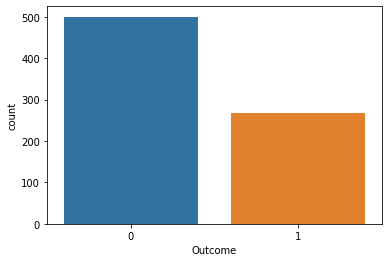

In [ ]:
# countplot----Plot the frequency of the class
sns.countplot(dataset['Outcome'])   #counts of observations in each categorical bin using bars.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f098b523ed0>,
      dtype=object)

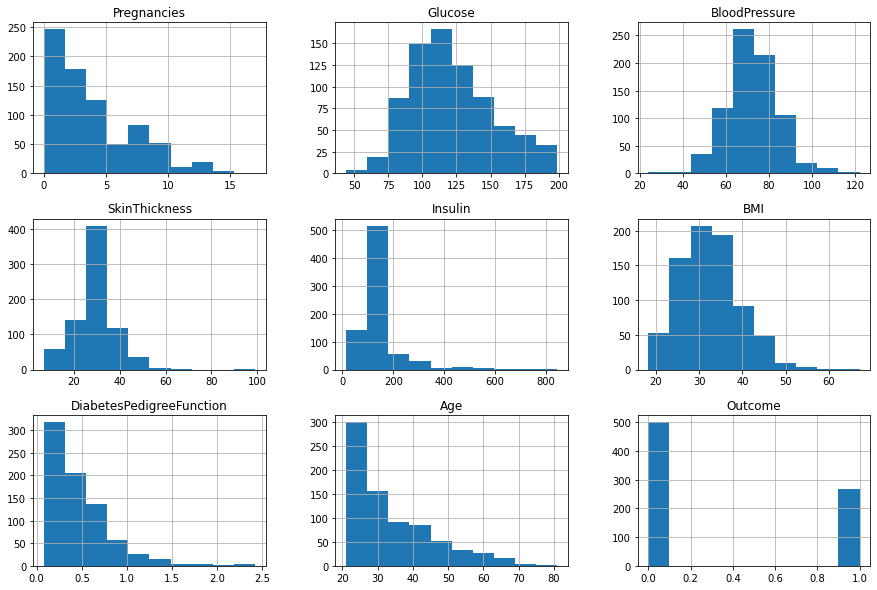

In [ ]:
#histogram
dataset.hist(figsize=(15,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

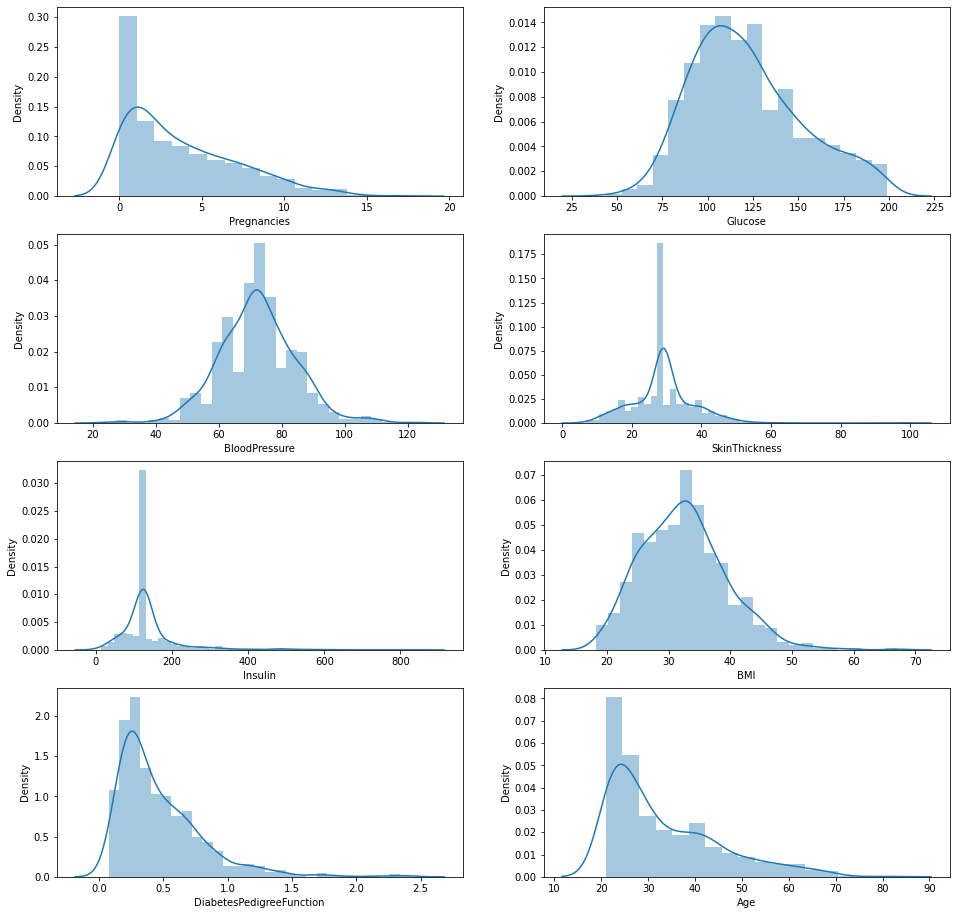

In [ ]:
# Distplot: describes the variance in the dataset
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(dataset['Pregnancies'],ax=ax2[0][0])
sns.distplot(dataset['Glucose'],ax=ax2[0][1])
sns.distplot(dataset['BloodPressure'],ax=ax2[1][0])
sns.distplot(dataset['SkinThickness'],ax=ax2[1][1])
sns.distplot(dataset['Insulin'],ax=ax2[2][0])
sns.distplot(dataset['BMI'],ax=ax2[2][1])
sns.distplot(dataset['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(dataset['Age'],ax=ax2[3][1])

In [ ]:
# pairplot--Multiple relationship of scatterplot
sns.pairplot(dataset,hue='Outcome')

In [ ]:
# corrlation matrix 
cor=dataset.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


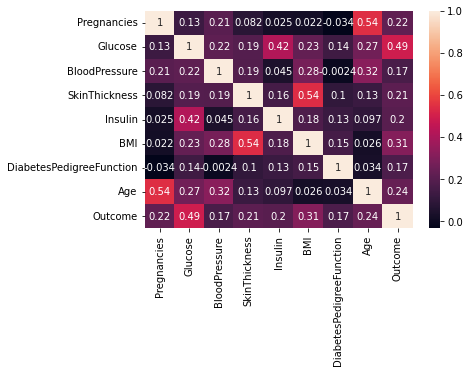

In [ ]:
#heatmap
sns.heatmap(cor,annot=True)

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X[0])

[  6.    148.     72.     35.    125.     33.6     0.627  50.   ]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7708333333333334
F1 Score: 0.7650259909031839


In [ ]:
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test,y_pred))


Confusion Matrix:
 [[113  17]
 [ 27  35]]


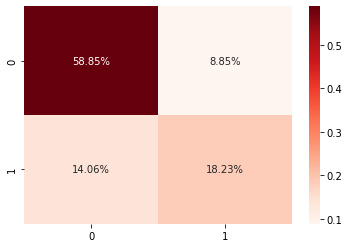

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds') #divide the value by the total to get a percentage

## **PIMA INDIANS DATASET**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
train_df, test_df = train_test_split(df, test_size = 0.1)

In [4]:
train_X, train_y = train_df.drop('Outcome', axis=1), train_df['Outcome']
test_X, test_y = test_df.drop('Outcome', axis=1), test_df['Outcome']

In [5]:
class NaiveBayesClassifier():
  def __separate(self, X, y):
    separated = [[] for _ in range(self.num_classes)]
    for i in range(len(X)):
      separated[y[i]].append(X[i])
    return separated

  def __calc_prob(self, x, mean, std):
    expo = np.exp(-((x-mean)**2)/(2 * std**2))
    return (1 / (np.sqrt(2*np.pi) * std)) * expo

  def __calculate_class(self, x):
    probs = [1] * self.num_classes
    for i in range(len(self.summaries)):
      for j in range(len(x)):
        probs[i] *= self.__calc_prob(x[j], self.summaries[i]['mean'][j],
                                     self.summaries[i]['std'][j])
    return np.argmax(probs)

  def fit(self, X, y):
    self.num_classes = np.max(y) + 1
    separated = self.__separate(X, y)
    self.summaries = []
    for i in range(len(separated)):
      self.summaries.append({
          'mean': np.mean(separated[i], axis = 0),
          'std': np.std(separated[i], axis = 0)
      })

  def predict(self, X):
    preds = []
    for x in X:
      preds.append(self.__calculate_class(x))
    return preds

In [6]:
clf = NaiveBayesClassifier()

In [7]:
clf.fit(train_X.to_numpy(), train_y.to_numpy())

In [8]:
preds = clf.predict(test_X.to_numpy())

In [9]:
print(metrics.classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        52
           1       0.67      0.80      0.73        25

    accuracy                           0.81        77
   macro avg       0.78      0.80      0.79        77
weighted avg       0.82      0.81      0.81        77



## **MPI**

### **BINARY SEARCH**

In [ ]:
binary_search_mpi_code = '''
#include <bits/stdc++.h>
#include <chrono>
#include <mpi.h>
#define N 10000
#define MAX_VAL 1000000
#define IDX 9912
#define SEND_TAG 2001
#define RECEIVE_TAG 2002
#define ROOT_PROCESS 0
using namespace std;

int master_array[N];
int slave_array[N];
int element_to_search;

void generate_array() {
	srand(time(0));
	for(int i = 0; i < N; i++) master_array[i] = rand() % MAX_VAL;
	sort(master_array, master_array + N);
	element_to_search = master_array[IDX];
}

int binary_search(int arr[], int low, int high, int x) {
	while(low <= high) {
		int mid = (low + high) / 2;
		if(arr[mid] == x) return mid;
		else if(arr[mid] < x) low = mid + 1;
		else high = mid - 1;
	}
	return -1;
}

void send_data(int id, int num_procs) {
	int start = N / num_procs * id;
	int length = (id < num_procs-1) ? N / num_procs : N - start;
	MPI_Send(&length, 1, MPI_INT, id, SEND_TAG, MPI_COMM_WORLD);
	MPI_Send(&master_array[start], length, MPI_INT, id, SEND_TAG, MPI_COMM_WORLD);
	MPI_Send(&element_to_search, 1, MPI_INT, id, SEND_TAG, MPI_COMM_WORLD);
}

void receive_data(int id, int num_procs, MPI_Status status) {
	int length, search_element;
	MPI_Recv(&length, 1, MPI_INT, ROOT_PROCESS, SEND_TAG, MPI_COMM_WORLD, &status);
	MPI_Recv(&slave_array, length, MPI_INT, ROOT_PROCESS, SEND_TAG, MPI_COMM_WORLD, &status);
	MPI_Recv(&search_element, 1, MPI_INT, ROOT_PROCESS, SEND_TAG, MPI_COMM_WORLD, &status);
	int idx = binary_search(slave_array, 0, length, search_element);
	if(idx != -1) {
		int i = N / num_procs * id + idx;
		cout << "Element found at process " << id << " at: " << i << "." << endl;
	}
}

int main(int argc, char** argv) {
	MPI_Status status;

	int id, num_procs;
	MPI_Init(&argc, &argv);
	MPI_Comm_rank(MPI_COMM_WORLD, &id);
	MPI_Comm_size(MPI_COMM_WORLD, &num_procs);
	if(id == ROOT_PROCESS) {
		generate_array();
		auto start = chrono::steady_clock::now();
		for(int i = 1; i < num_procs; i++) {
			send_data(i, num_procs);
		}
		int idx = binary_search(master_array, 0, N / num_procs - 1, element_to_search);
    auto end = chrono::steady_clock::now();
		if(idx != -1) cout << "Element found at root process at: " << idx << "." << endl;
		cout << "MPI STATISTICS:" << endl;
    cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds" << endl;
	}
	else {
		receive_data(id, num_procs, status);
	}
	MPI_Finalize();
}
'''

In [ ]:
binary_search_mpi = open("binary_search_mpi_code.cpp", "w")
binary_search_mpi.write(binary_search_mpi_code)
binary_search_mpi.close()

In [ ]:
!mpic++ binary_search_mpi_code.cpp

In [ ]:
!mpirun --allow-run-as-root -np 10 ./a.out

MPI STATISTICS:
Time taken: 631 microseconds
Element found at process 9 at: 9912.


### **DFS**

In [ ]:
dfs_mpi_code = '''
#include <bits/stdc++.h>
#include <chrono>
#include <mpi.h>
#define N 127
#define TREES 4
#define SEND_TAG 2001
#define RECEIVE_TAG 2002
#define ROOT_PROCESS 0
using namespace std;

int master_array[N];
int slave_array[N];

void generate_tree(int low, int high, int idx, int offset) {
	if(low <= high && idx < N) {
		int mid = (low + high) / 2;
		master_array[idx] = mid + offset;
		generate_tree(low, mid-1, 2*idx+1, offset);
		generate_tree(mid+1, high, 2*idx+2, offset);
	}
}

void inorder(int *array, int low, int high) {
	if(low <= high) {
		inorder(array, low*2+1, high);
		cout << array[low] << ' ';
		inorder(array, low*2+2, high);
	}
}

int main(int argc, char** argv) {
	MPI_Status status;

	int id, num_procs;
	MPI_Init(&argc, &argv);
	MPI_Comm_rank(MPI_COMM_WORLD, &id);
	MPI_Comm_size(MPI_COMM_WORLD, &num_procs);
	if(id == ROOT_PROCESS) {
		auto start = chrono::steady_clock::now();
		for(int i = 1; i < num_procs; i++) {
			generate_tree(0, N-1, 0, i*100);
			MPI_Send(&master_array[0], N, MPI_INT, i, SEND_TAG, MPI_COMM_WORLD);
		}
		cout << "Root process: ";
		generate_tree(0, N-1, 0, 0);
		inorder(master_array, 0, N-1);
		cout << endl;
    	auto end = chrono::steady_clock::now();
		cout << "MPI STATISTICS:" << endl;
    	cout << "Time taken: " << chrono::duration_cast<chrono::microseconds>(end - start).count() << " microseconds" << endl;
	}
	else {
		MPI_Recv(&slave_array, N, MPI_INT, ROOT_PROCESS, SEND_TAG, MPI_COMM_WORLD, &status);
		cout << "Process " << id << ": ";
		inorder(slave_array, 0, N-1);
		cout << endl;
	}
	MPI_Finalize();
}
'''

In [ ]:
dfs_mpi = open("dfs_mpi_code.cpp", "w")
dfs_mpi.write(dfs_mpi_code)
dfs_mpi.close()

In [ ]:
!mpic++ dfs_mpi_code.cpp

In [ ]:
!mpirun --allow-run-as-root -np 4 ./a.out

Root process: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 
MPI STATISTICS:
Time taken: 143 microseconds
Process 2: 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 
Process 3: 300 301 302

## **PTHREAD.H**

In [ ]:
thread_code = '''
#include <iostream>
#include <stdlib.h>
#include <stdio.h>
#include <string.h>
#include <pthread.h>
#include <unistd.h>
void * threadFunc(void * arg)
{
    std::cout << "Thread Function :: Start" << std::endl;
    // Sleep for 2 seconds
    sleep(2);
    std::cout << "Thread Function :: End" << std::endl;
    return NULL;
}
int main()
{
    // Thread id
    pthread_t threadId;
    // Create a thread that will function threadFunc()
    int err = pthread_create(&threadId, NULL, &threadFunc, NULL);
    // Check if thread is created sucessfuly
    if (err)
    {
        std::cout << "Thread creation failed : " << strerror(err);
        return err;
    }
    else
        std::cout << "Thread Created with ID : " << threadId << std::endl;
    // Do some stuff in Main Thread
    std::cout << "Waiting for thread to exit" << std::endl;
    // Wait for thread to exit
    err = pthread_join(threadId, NULL);
    // check if joining is sucessful
    if (err)
    {
        std::cout << "Failed to join Thread : " << strerror(err) << std::endl;
        return err;
    }
    std::cout << "Exiting Main" << std::endl;
    return 0;
}
'''

In [ ]:
thread = open("thread_code.cpp", "w")
thread.write(thread_code)
thread.close()

In [ ]:
!g++ -fopenmp thread_code.cpp
!./a.out

Thread Created with ID : 139834144986880
Waiting for thread to exit
Thread Function :: Start
Thread Function :: End
Exiting Main


# **A* 8-PUZZLE**

In [ ]:
import numpy as np
np.random.seed(42)

In [ ]:
class Node():
  def __init__(self, state, parent = None, depth = 0):
    self.state = state
    self.parent = parent
    self.depth = depth

  def __eq__(self, other):
    return np.array_equal(self.state, other.state)

In [ ]:
class PuzzleSolver():  
  def __init__(self, n = 8):
    self.n = n
    self.side_length = int(np.sqrt(n+1))
    assert self.__check_dims(), "Invalid value of N."
    self.__generate_states()
    # self.initial_state = self.__generate_state()
    # self.final_state = self.__generate_state()
    # final_state = np.array([i+1 if i < n else 0 for i in range(n+1)])
    # self.final_state = np.resize(final_state, (self.side_length,self.side_length))

  def __check_dims(self):
    return self.side_length ** 2 == self.n + 1

  def __generate_state(self):
    state = np.arange(self.n + 1)
    np.random.shuffle(state)
    return np.resize(state, (self.side_length,self.side_length))

  def __generate_states(self):
    state = np.arange(self.n + 1)
    np.random.shuffle(state)
    self.initial_state = np.resize(state, (self.side_length,self.side_length))
    node = Node(self.initial_state)
    for i in range(6):
      node = np.random.choice(self.__generate_moves(node))
      # print(node.state)
    self.final_state = node.state

  def __gscore(self, node):
    return node.depth

  def __hscore(self, node):
    score = 0
    for i in range(self.side_length):
      for j in range(self.side_length):
        if node.state[i][j] != 0 and node.state[i][j] != self.final_state[i][j]:
          score += 1
    return score

  def __fscore(self, node):
    return self.__gscore(node) + self.__hscore(node)

  def __generate_moves(self, node):
    for i in range(self.side_length):
      for j in range(self.side_length):
        if node.state[i][j] == 0: break
      if node.state[i][j] == 0: break
    temp_nodes = [node.state.copy() for _ in range(4)]
    temp_nodes[0][i][j] = temp_nodes[0][i][min(j+1,self.side_length-1)]
    temp_nodes[0][i][min(j+1,self.side_length-1)] = 0
    temp_nodes[1][i][j] = temp_nodes[1][i][max(j-1,0)]
    temp_nodes[1][i][max(j-1,0)] = 0
    temp_nodes[2][i][j] = temp_nodes[2][min(i+1,self.side_length-1)][j]
    temp_nodes[2][min(i+1,self.side_length-1)][j] = 0
    temp_nodes[3][i][j] = temp_nodes[3][max(i-1,0)][j]
    temp_nodes[3][max(i-1,0)][j] = 0
    if node.parent is None:
      nodes = [Node(tn,node,node.depth+1) for tn in temp_nodes if not np.array_equal(tn,node.state)]
    else:
      nodes = [Node(tn,node,node.depth+1) for tn in temp_nodes if not np.array_equal(tn,node.state) and not np.array_equal(tn,node.parent.state)]
    return nodes

  def solve(self):
    root_node = Node(self.initial_state)
    live_nodes = []
    dead_nodes = []
    current_node = root_node
    found_solution = True
    while not np.array_equal(current_node.state, self.final_state):
      best_val = 1e4
      best_node = None
      live_nodes = self.__generate_moves(current_node)
      for node in live_nodes:
        score = self.__fscore(node)
        if score < best_val and node not in dead_nodes:
          best_val = score
          best_node = node
      if best_val == 1e4:
        print("NO SOLUTION.")
        found_solution = False
        break
      dead_nodes.append(current_node)
      current_node = best_node
      # print(best_val)
      # print(current_node.state)
    print("COMPLETE!")
    if found_solution:
      path = [current_node.state.copy()]
      while current_node.parent is not None:
        current_node = current_node.parent
        path.append(current_node.state.copy())
      path.reverse()
      for state in path:
        print(state)

In [ ]:
ps = PuzzleSolver()
print(ps.initial_state)
print(ps.final_state)

[[7 1 5]
 [0 8 2]
 [4 3 6]]
[[1 0 2]
 [7 5 8]
 [4 3 6]]


In [ ]:
ps.solve()

COMPLETE!
[[7 1 5]
 [0 8 2]
 [4 3 6]]
[[0 1 5]
 [7 8 2]
 [4 3 6]]
[[1 0 5]
 [7 8 2]
 [4 3 6]]
[[1 5 0]
 [7 8 2]
 [4 3 6]]
[[1 5 2]
 [7 8 0]
 [4 3 6]]
[[1 5 2]
 [7 0 8]
 [4 3 6]]
[[1 0 2]
 [7 5 8]
 [4 3 6]]


##DISEASE EXPERT SYSTEM

In [ ]:
%%capture
!pip install experta  #expert system library

In [ ]:
#Import statement/s
from experta import *

#Constant String Values
yes = "y"
no = "n"
find_disease = "find_disease"

In [ ]:

#Global Variables
diseases_list = []
diseases_symptoms = []
symptom_map = {}

In [ ]:
#Set up the global variables
def preprocess():

	#global variables
	global diseases_list,diseases_symptoms,symptom_map
	
	#fetch the list of diseases
	diseases = open("Diseases.txt")
	diseases_t = diseases.read()
	diseases_list = diseases_t.split("\n")
	diseases.close()
	
	#fetch the symptom for each disease
	for disease in diseases_list:
		
		#Open the file containing symptom for a disease
		disease_s_file = open("Disease symptoms/" + disease + ".txt")
		disease_s_data = disease_s_file.read()
		
		#Fetch the symptom as a list
		s_list = disease_s_data.split("\n")
		s_list = [yes if x=="yes" else no for x in s_list]
		diseases_symptoms.append(s_list)
		
		#Map the list to a disease
		symptom_map[str(s_list)] = disease
		
		#Close the file
		disease_s_file.close()
  
#Expert System class. Knowledge Engine is a class
class MedicalExpertSystem(KnowledgeEngine):

	#Prerequisite for KnowledgeEngine to run - find_disease action
	@DefFacts() #decorator, facts are declared
	def _initial_action(self):
		print("\nPYTHON MEDICAL EXPERT SYSTEM\nAnswer the following questions in '{yes}' or '{no}'.\nDo you feel any of the following symptoms:\n".format(yes=yes,no=no))
		yield Fact(action="find_disease")

	'''PERCEPTION''' # try to delete this and execute
	#Declaring Symptom
	@Rule(Fact(action=find_disease), NOT(Fact(headache=W())),salience = 1) # what is W()? matches if any fact called headache
	def symptom_0(self):
		self.declare(Fact(headache=input("headache: ")))

	@Rule(Fact(action=find_disease), NOT(Fact(back_pain=W())),salience = 1)
	def symptom_1(self):
		self.declare(Fact(back_pain=input("back pain: ")))

	@Rule(Fact(action=find_disease), NOT(Fact(chest_pain=W())),salience = 1)
	def symptom_2(self):
		self.declare(Fact(chest_pain=input("chest pain: ")))

	@Rule(Fact(action=find_disease), NOT(Fact(cough=W())),salience = 1)
	def symptom_3(self):
		self.declare(Fact(cough=input("cough: ")))

	@Rule(Fact(action=find_disease), NOT(Fact(fainting=W())),salience = 1)
	def symptom_4(self):
		self.declare(Fact(fainting=input("fainting: ")))

	@Rule(Fact(action=find_disease), NOT(Fact(fatigue=W())),salience = 1)
	def symptom_5(self):
		self.declare(Fact(fatigue=input("fatigue: ")))
	 
	@Rule(Fact(action=find_disease), NOT(Fact(sunken_eyes=W())),salience = 1)
	def symptom_6(self):
		self.declare(Fact(sunken_eyes=input("sunken eyes: ")))
	
	@Rule(Fact(action=find_disease), NOT(Fact(low_body_temp=W())),salience = 1)
	def symptom_7(self):
		self.declare(Fact(low_body_temp=input("low body temperature: ")))
	
	@Rule(Fact(action=find_disease), NOT(Fact(restlessness=W())),salience = 1)
	def symptom_8(self):
		self.declare(Fact(restlessness=input("restlessness: ")))
	
	@Rule(Fact(action=find_disease), NOT(Fact(sore_throat=W())),salience = 1)
	def symptom_9(self):
		self.declare(Fact(sore_throat=input("sore throat: ")))
	
	@Rule(Fact(action=find_disease), NOT(Fact(fever=W())),salience = 1)
	def symptom_10(self):
		self.declare(Fact(fever=input("fever: ")))

	@Rule(Fact(action=find_disease), NOT(Fact(nausea=W())),salience = 1)
	def symptom_11(self):
		self.declare(Fact(nausea=input("nausea: ")))

	@Rule(Fact(action=find_disease), NOT(Fact(blurred_vision=W())),salience = 1)
	def symptom_12(self):
		self.declare(Fact(blurred_vision=input("blurred vision: ")))

	'''COGNITION'''
	#Finding an exact match of symptoms for the disease
	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=no),Fact(chest_pain=no),Fact(cough=no),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=yes),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=yes),Fact(sunken_eyes=no),Fact(nausea=yes),Fact(blurred_vision=no))
	def disease_0(self):
		self.declare(Fact(disease="Jaundice"))

	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=no),Fact(chest_pain=no),Fact(cough=no),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=no),Fact(restlessness=yes),Fact(low_body_temp=no),Fact(fever=no),Fact(sunken_eyes=no),Fact(nausea=no),Fact(blurred_vision=no))
	def disease_1(self):
		self.declare(Fact(disease="Alzheimers"))

	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=yes),Fact(chest_pain=no),Fact(cough=no),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=yes),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=no),Fact(sunken_eyes=no),Fact(nausea=no),Fact(blurred_vision=no))
	def disease_2(self):
		self.declare(Fact(disease="Arthritis"))

	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=no),Fact(chest_pain=yes),Fact(cough=yes),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=no),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=yes),Fact(sunken_eyes=no),Fact(nausea=no),Fact(blurred_vision=no))
	def disease_3(self):
		self.declare(Fact(disease="Tuberculosis"))

	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=no),Fact(chest_pain=yes),Fact(cough=yes),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=no),Fact(restlessness=yes),Fact(low_body_temp=no),Fact(fever=no),Fact(sunken_eyes=no),Fact(nausea=no),Fact(blurred_vision=no))
	def disease_4(self):
		self.declare(Fact(disease="Asthma"))

	@Rule(Fact(action=find_disease),Fact(headache=yes),Fact(back_pain=no),Fact(chest_pain=no),Fact(cough=yes),Fact(fainting=no),Fact(sore_throat=yes),Fact(fatigue=no),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=yes),Fact(sunken_eyes=no),Fact(nausea=no),Fact(blurred_vision=no))
	def disease_5(self):
		self.declare(Fact(disease="Sinusitis"))

	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=no),Fact(chest_pain=no),Fact(cough=no),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=yes),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=no),Fact(sunken_eyes=no),Fact(nausea=no),Fact(blurred_vision=no))
	def disease_6(self):
		self.declare(Fact(disease="Epilepsy"))

	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=no),Fact(chest_pain=yes),Fact(cough=no),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=no),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=no),Fact(sunken_eyes=no),Fact(nausea=yes),Fact(blurred_vision=no))
	def disease_7(self):
		self.declare(Fact(disease="Heart Disease"))

	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=no),Fact(chest_pain=no),Fact(cough=no),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=yes),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=no),Fact(sunken_eyes=no),Fact(nausea=yes),Fact(blurred_vision=yes))
	def disease_8(self):
		self.declare(Fact(disease="Diabetes"))

	@Rule(Fact(action=find_disease),Fact(headache=yes),Fact(back_pain=no),Fact(chest_pain=no),Fact(cough=no),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=no),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=no),Fact(sunken_eyes=no),Fact(nausea=yes),Fact(blurred_vision=yes))
	def disease_9(self):
		self.declare(Fact(disease="Glaucoma"))

	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=no),Fact(chest_pain=no),Fact(cough=no),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=yes),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=no),Fact(sunken_eyes=no),Fact(nausea=yes),Fact(blurred_vision=no))
	def disease_10(self):
		self.declare(Fact(disease="Hyperthyroidism"))

	@Rule(Fact(action=find_disease),Fact(headache=yes),Fact(back_pain=no),Fact(chest_pain=no),Fact(cough=no),Fact(fainting=no),Fact(sore_throat=no),Fact(fatigue=no),Fact(restlessness=no),Fact(low_body_temp=no),Fact(fever=yes),Fact(sunken_eyes=no),Fact(nausea=yes),Fact(blurred_vision=no))
	def disease_11(self):
		self.declare(Fact(disease="Heat Stroke"))

	@Rule(Fact(action=find_disease),Fact(headache=no),Fact(back_pain=no),Fact(chest_pain=no),Fact(cough=no),Fact(fainting=yes),Fact(sore_throat=no),Fact(fatigue=no),Fact(restlessness=no),Fact(low_body_temp=yes),Fact(fever=no),Fact(sunken_eyes=no),Fact(nausea=no),Fact(blurred_vision=no))
	def disease_12(self):
		self.declare(Fact(disease="Hypothermia"))

	'''ACTION'''
	#Rule to be fired if disease is found
	@Rule(
		Fact(action=find_disease),
		Fact(disease=MATCH.disease), #Matching a diseases right?
		
		salience = -998 #why -998?
	)
	def disease(self, disease):
		print("\n\nThe most probable disease that you have is {disease}".format(disease=disease))
		
	'''ACTION'''
	#Rule to be fired if the disease is not found
	@Rule(
	
		Fact(action=find_disease),
		
    Fact(headache=MATCH.headache),
		Fact(back_pain=MATCH.back_pain),
		Fact(chest_pain=MATCH.chest_pain),
		Fact(cough=MATCH.cough),
		Fact(fainting=MATCH.fainting),
		Fact(sore_throat=MATCH.sore_throat),
		Fact(fatigue=MATCH.fatigue),
		Fact(low_body_temp=MATCH.low_body_temp),
		Fact(restlessness=MATCH.restlessness),
		Fact(fever=MATCH.fever),
		Fact(sunken_eyes=MATCH.sunken_eyes),
		Fact(nausea=MATCH.nausea),
		Fact(blurred_vision=MATCH.blurred_vision),
		
		NOT(Fact(disease=W())),
		
		salience = -999
	)
	def not_matched(self,headache, back_pain, chest_pain, cough, fainting, sore_throat, fatigue, restlessness,low_body_temp ,fever ,sunken_eyes ,nausea ,blurred_vision):
		'''GOAL'''
		print("\nDid not find any disease that matches your exact symptoms")
	
		
		#Find Diseases whose symptom matches the highest number  
		lis = [headache, back_pain, chest_pain, cough, fainting, sore_throat, fatigue, restlessness,low_body_temp ,fever ,sunken_eyes ,nausea ,blurred_vision]
		max_count = 0
		max_disease = ""
		for key,val in symptom_map.items():
			count = 0
			temp_list = eval(key)
			for j in range(0,len(lis)):
				if(temp_list[j] == lis[j] and lis[j] == yes):
					count = count + 1
			if count > max_count:
				max_count = count
				max_disease = val
		'''GOAL'''
		print("\n\nBased on your symptoms however, the most probable disease that you have is {disease}\n".format(disease=max_disease))


preprocess()
engine = MedicalExpertSystem()

In [ ]:
engine.reset()
engine.run()


PYTHON MEDICAL EXPERT SYSTEM
Answer the following questions in 'y' or 'n'.
Do you feel any of the following symptoms:

nausea: y
fainting: y
sunken eyes: y
back pain: y
blurred vision: 
fever: y
chest pain: y
fatigue: y
cough: y
low body temperature: y
headache: y
sore throat: y
restlessness: y

Did not find any disease that matches your exact symptoms


Based on your symptoms however, the most probable disease that you have is Sinusitis



# **DISEASE CLASSIFICATION**

In [ ]:
!unzip 'dataset.zip'

Archive:  dataset.zip
  inflating: Symptom-severity.csv    
  inflating: dataset.csv             
  inflating: symptom_Description.csv  
  inflating: symptom_precaution.csv  


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
symptoms_df = pd.read_csv('Symptom-severity.csv')
symptoms_df.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [ ]:
len(symptoms_df)

133

In [ ]:
df = pd.read_csv('dataset.csv')
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = df.drop('Disease', axis=1).to_numpy()
y = df['Disease'].to_numpy()

In [ ]:
symptoms = symptoms_df['Symptom'].to_numpy()
symptom_dic = {}
for i in range(len(symptoms)):
  symptom_dic[symptoms[i]] = i

In [ ]:
X_new = np.zeros((len(X),len(symptoms)))

In [ ]:
for i in range(len(X)):
  for j in range(len(X[i])):
    if X[i][j] is np.nan: break
    key = ''.join(X[i][j].split(' '))
    X_new[i][symptom_dic[key]] = 1

In [ ]:
disease_dict = {}
for i, d in enumerate(df['Disease'].unique()):
  disease_dict[d] = i

In [ ]:
y_new = np.array([disease_dict[d] for d in y])
y_new = tf.one_hot(y_new, np.max(y_new+1)).numpy()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(41, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1)

In [ ]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
139/139 [==============================] - 1s 3ms/step - loss: 1.6042 - accuracy: 0.6317
Epoch 2/5
139/139 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9998
Epoch 3/5
139/139 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4/5
139/139 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/5
139/139 [==============================] - 0s 3ms/step - loss: 6.3466e-04 - accuracy: 1.0000


In [ ]:
preds = model.predict(X_test)

In [ ]:
y_pred = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')

Accuracy: 1.0


##BIGMART SALES ANALYSIS


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/data_da_3.csv')  #contains y values
df_test = pd.read_csv('/content/test_da_3.csv') # does not contain y values
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df_test


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
for col in df.columns:
  print(f'{col}: {len(df[col].unique())}, NaN count: {df[col].isna().sum()}')

Item_Identifier: 1559, NaN count: 0
Item_Weight: 416, NaN count: 1463
Item_Fat_Content: 5, NaN count: 0
Item_Visibility: 7880, NaN count: 0
Item_Type: 16, NaN count: 0
Item_MRP: 5938, NaN count: 0
Outlet_Identifier: 10, NaN count: 0
Outlet_Establishment_Year: 9, NaN count: 0
Outlet_Size: 4, NaN count: 2410
Outlet_Location_Type: 3, NaN count: 0
Outlet_Type: 4, NaN count: 0
Item_Outlet_Sales: 3493, NaN count: 0


In [ ]:
for col in df_test.columns:
  print(f'{col}: {len(df_test[col].unique())}, NaN count: {df_test[col].isna().sum()}')

Item_Identifier: 1543, NaN count: 0
Item_Weight: 411, NaN count: 976
Item_Fat_Content: 5, NaN count: 0
Item_Visibility: 5277, NaN count: 0
Item_Type: 16, NaN count: 0
Item_MRP: 4402, NaN count: 0
Outlet_Identifier: 10, NaN count: 0
Outlet_Establishment_Year: 9, NaN count: 0
Outlet_Size: 4, NaN count: 1606
Outlet_Location_Type: 3, NaN count: 0
Outlet_Type: 4, NaN count: 0


In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x = np.expand_dims(df['Item_Weight'], axis = -1) ##converts the column into a numpy array
df['Item_Weight'] = np.reshape(imp_mean.fit_transform(x), (len(x)))

In [ ]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [ ]:
x = np.expand_dims(df_test['Item_Weight'], axis = -1)
df_test['Item_Weight'] = np.reshape(imp_mean.fit_transform(x), (len(x)))

In [ ]:
df_test['Item_Weight']

0       20.750000
1        8.300000
2       14.600000
3        7.315000
4       12.695633
          ...    
5676    10.500000
5677     7.600000
5678    10.000000
5679    15.300000
5680     9.500000
Name: Item_Weight, Length: 5681, dtype: float64

In [ ]:
x = df['Outlet_Size']
for i in range(len(x)):
  if x[i] is np.nan: x[i] = 'Medium'
df['Outlet_Size'] = x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
x = df_test['Outlet_Size']
for i in range(len(x)):
  if x[i] is np.nan: x[i] = 'Medium'
df_test['Outlet_Size'] = x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_test['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
5676     Small
5677    Medium
5678    Medium
5679    Medium
5680    Medium
Name: Outlet_Size, Length: 5681, dtype: object

In [ ]:
for col in df.columns:
  print(f'{col}: {len(df[col].unique())}, NaN count: {df[col].isna().sum()}')

Item_Identifier: 1559, NaN count: 0
Item_Weight: 416, NaN count: 0
Item_Fat_Content: 5, NaN count: 0
Item_Visibility: 7880, NaN count: 0
Item_Type: 16, NaN count: 0
Item_MRP: 5938, NaN count: 0
Outlet_Identifier: 10, NaN count: 0
Outlet_Establishment_Year: 9, NaN count: 0
Outlet_Size: 3, NaN count: 0
Outlet_Location_Type: 3, NaN count: 0
Outlet_Type: 4, NaN count: 0
Item_Outlet_Sales: 3493, NaN count: 0


In [ ]:
for col in df_test.columns:
  print(f'{col}: {len(df_test[col].unique())}, NaN count: {df_test[col].isna().sum()}')

Item_Identifier: 1543, NaN count: 0
Item_Weight: 411, NaN count: 0
Item_Fat_Content: 5, NaN count: 0
Item_Visibility: 5277, NaN count: 0
Item_Type: 16, NaN count: 0
Item_MRP: 4402, NaN count: 0
Outlet_Identifier: 10, NaN count: 0
Outlet_Establishment_Year: 9, NaN count: 0
Outlet_Size: 3, NaN count: 0
Outlet_Location_Type: 3, NaN count: 0
Outlet_Type: 4, NaN count: 0


In [ ]:
X = df.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales'] ##dependent var

In [ ]:
X_sub = df_test.drop(['Item_Identifier'], axis=1)

In [ ]:
linear_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP'] ##Columns with continuous variables

In [ ]:
X_scaled = X.copy()
scaler = MinMaxScaler()
for col in X.columns:
  if col in linear_cols:
    x = np.expand_dims(X[col], axis=-1)
    X_scaled[col] = np.reshape(scaler.fit_transform(x), (len(x)))
  else:
    x = X[col]
    X_scaled.drop(col, axis=1, inplace=True)
    X_scaled = X_scaled.join(pd.get_dummies(x, prefix=col))


In [ ]:
X_sub_scaled = X_sub.copy()
for col in X_sub.columns:
  if col in linear_cols:
    x_sub = np.expand_dims(X_sub[col], axis=-1)
    X_sub_scaled[col] = np.reshape(scaler.fit_transform(x_sub), (len(x_sub)))
  else:
    x_sub = X_sub[col]
    X_sub_scaled.drop(col, axis=1, inplace=True)
    X_sub_scaled = X_sub_scaled.join(pd.get_dummies(x_sub, prefix=col))##get_dummies- one hot encoding, categorical values 1 and 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

##SKLearn


In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
preds = reg.predict(X_test)

In [ ]:
for i in range(len(preds)):
  preds[i] = max(0, preds[i])

In [ ]:
mse = mean_squared_error(y_test, preds)
print(f'MSE: {mse}, RMSE: {np.sqrt(mse)}')

MSE: 1133465.5367624972, RMSE: 1064.6433847831381


In [ ]:
reg = LinearRegression().fit(X_scaled, y) ##training on the entire dataset

In [ ]:
preds = reg.predict(X_sub_scaled)

In [ ]:
sub_df = df_test[['Item_Identifier', 'Outlet_Identifier']]

In [ ]:
sub_df['Item_Outlet_Sales'] = preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sub_df.to_csv('submission_lr.csv', index=False)

##Neural Network

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
# relu fucntion cuts all the negative values and is used mainly for scaling so that the outputs of the next layers do not blow up
# Last output should be linear as we want absolute continuous values of the output

In [ ]:
model.compile(optimizer='adam', #used for controlling the momentum in gradient descent. It converges faster in the beginning and
                              # and slower at the end so that we are do not jump past the minimum value.
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [ ]:
X_train = tf.convert_to_tensor(X_train)#tensors are like arrays but just an object
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=100)

Epoch 1/100
60/60 [==============================] - 4s 7ms/step - loss: 6648562.0000 - mse: 6648562.0000
Epoch 2/100
60/60 [==============================] - 0s 7ms/step - loss: 2480498.0000 - mse: 2480498.0000
Epoch 3/100
60/60 [==============================] - 0s 7ms/step - loss: 1990563.6250 - mse: 1990563.6250
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - loss: 1712183.3750 - mse: 1712183.3750
Epoch 5/100
60/60 [==============================] - 0s 7ms/step - loss: 1420665.7500 - mse: 1420665.7500
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 1229090.3750 - mse: 1229090.3750
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 1199410.1250 - mse: 1199410.1250
Epoch 8/100
60/60 [==============================] - 0s 7ms/step - loss: 1192571.1250 - mse: 1192571.1250
Epoch 9/100
60/60 [==============================] - 0s 7ms/step - loss: 1180983.3750 - mse: 1180983.3750
Epoch 10/100
60/60 [==========================

In [ ]:
preds = model.predict(X_test)

In [ ]:
for i in range(len(preds)):
  preds[i] = max(0, preds[i])

In [ ]:
mse = mean_squared_error(y_test, preds)
print(f'MSE: {mse}, RMSE: {np.sqrt(mse)}')

MSE: 1100648.8201423541, RMSE: 1049.1181154390358


In [ ]:
preds = model.predict(X_sub_scaled)

In [ ]:
for i in range(len(preds)):
  preds[i] = max(0, preds[i])

In [ ]:
sub_df = df_test[['Item_Identifier', 'Outlet_Identifier']]

In [ ]:
sub_df['Item_Outlet_Sales'] = preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sub_df.to_csv('submission_nn.csv', index=False)

##TWITTER DATA ANALYSIS



In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

In [ ]:
class TwitterClient(object):
    #Generic Twitter Class for sentiment analysis.
    def __init__(self):
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'wKs4oj5j7EpRh5WuOjz5smPj6'
        consumer_secret = 'XVnMSaQqkAnH3l9CssedNNgQehOpkvlpRaIwDTTMjU7Byxyw6o'
        access_token = '897431456842039296-si6Y2NTTNrGVsVsJS5hX6bs46dGLurV'
        access_token_secret = 'eC8VhlQZ1hbrnN3PuDBf7i4ZO5Iq6oHaFaxRdofXibeXf'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())#re.sub() replace one string with another. 

    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0: #polarity= negative or positive tweet. Subjectivity= how subjective is it.
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
 
def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'Elon Musk')
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Love tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))

    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Hate tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))

    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))
    # picking neutral tweets from tweets
    neutral=[tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
 
    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:5]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:5]:
        print(tweet['text'])

    # printing first 5 neutral tweets
    print("\n\nNeutral tweets:")
    for tweet in neutral[:5]:
        print(tweet['text'])    
 
if __name__ == "__main__":
    # calling main function
    main()

Love tweets percentage: 25.0 %
Hate tweets percentage: 12.5 %
Neutral tweets percentage: 62.5 %


Positive tweets:
Everyone is talking about Elon Musk and what his fair share of taxes is…

Instead of how the government will spend… https://t.co/Fbz2JSzT8r
RT @Travis_in_Flint: I trust Elon Musk with the $8 billion he’ll be paying in taxes more than I trust our government with it.  He’ll actual…


Negative tweets:
There is a direct pipeline from poor schools and foster care and group homes straight to the prison system. The gov… https://t.co/f2Uj8Cr4j5


Neutral tweets:
RT @EricMMatheny: If Elon Musk wrote the Treasury Department a check for $150 billion, the Government would piss it away in 2 weeks. All th…
Pagar pau pra bilionário só faz com que as pautas debatidas e as decisões importantes sejam tomadas por quem tem in… https://t.co/ySpJtzBSDm
@Konstantin_Tekf Elon Musk'ta işin içinde bak gör sen😎
RT @jpr007: WALTER ISAACSON ON ELON MUSK https://t.co/nA4FBu2aZ4
RT @Reuters: ICYMI: Tesl

# **TWITTER SENTIMENT ANALYSIS**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train_da_4.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
X = [tokenizer.tokenize(phrase) for phrase in df['tweet']]
y = df['label']

In [ ]:
print(X[0])

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']


### **REMOVAL OF STOP WORDS**

In [ ]:
def remove_stop_words(X):
  stop_words = stopwords.words('english')
  X_no_stop = [[word for word in X[i] if word not in stop_words] for i in range(len(X))]
  return X_no_stop

In [ ]:
X_no_stop = remove_stop_words(X)

In [ ]:
print(X_no_stop[0])

['user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']


### **STEM WORDS IN DATASET**

In [ ]:
def stem_words(X):
  ps = PorterStemmer()
  X_stemmed = [[ps.stem(word) for word in X[i]] for i in range(len(X))]
  return X_stemmed

In [ ]:
X_stemmed = stem_words(X_no_stop)

In [ ]:
print(X_stemmed[0])

['user', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run']


### **TEXT VECTORIZATION**

In [ ]:
def vectorize_text(X):
  X_joined = [' '.join(X[i]) for i in range(len(X))]
  vec = TfidfVectorizer()
  X_vectorized = vec.fit_transform(X_joined)
  return X_vectorized

In [ ]:
X_vectorized = vectorize_text(X_stemmed)

In [ ]:
print(X_vectorized[0])

  (0, 26647)	0.23917420543386603
  (0, 17177)	0.22559278703087277
  (0, 9348)	0.3245092233367844
  (0, 27399)	0.33565401522483085
  (0, 9627)	0.7960071501267583
  (0, 10947)	0.1843095677725651
  (0, 32609)	0.07960113128652567


### **TEXT CLASSIFICATION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(28765, 35271)

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2984
           1       0.88      0.46      0.60       213

    accuracy                           0.96      3197
   macro avg       0.92      0.73      0.79      3197
weighted avg       0.96      0.96      0.95      3197



In [ ]:
print(confusion_matrix(y_test, preds))

[[2971   13]
 [ 116   97]]


## **SUBMISSION**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/test_da_4.csv')
df_test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [ ]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [ ]:
X_sub = [tokenizer.tokenize(phrase) for phrase in df['tweet']]
X_sub.extend([tokenizer.tokenize(phrase) for phrase in df_test['tweet']])

In [ ]:
X_sub_no_stop = remove_stop_words(X_sub)

In [ ]:
X_sub_stemmed = stem_words(X_sub_no_stop)

In [ ]:
X_sub_vectorized = vectorize_text(X_sub_stemmed)

In [ ]:
X_train, X_test = X_sub_vectorized[:31962], X_sub_vectorized[31962:]

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
sub_df = pd.DataFrame()
sub_df['id'] = [i for i in range(31963,49160)]
sub_df['label'] = preds

In [ ]:
sub_df.to_csv('preds.csv', index=False)

# **N-QUEENS**

In [ ]:
class NQueens:
  def __init__(self, size):
    self.n = size
    self.__reset_board()

  def __reset_board(self):
    self.board = [[0 for _ in range(self.n)] for _ in range(self.n)]

  def display(self):
    for i in range(self.n):
      for j in range(self.n):
        print('Q', end=' ') if self.board[i][j] else print('_', end=' ')
      print()

  def __is_valid(self, queens, idx):
    for i in range(idx):
      if queens[i] == queens[idx]: return False
      elif i + queens[i] == idx + queens[idx]: return False
      elif i - queens[i] == idx - queens[idx]: return False
    return True

  def solve_backtracking(self):
    self.__reset_board()
    queens = [0 for _ in range(self.n)]
    idx = 1
    while idx < self.n:
      found = False
      for i in range(queens[idx], self.n):
        queens[idx] = i
        if self.__is_valid(queens, idx):
          found = True
          break
      if not found:
        while queens[idx] == self.n-1:
          queens[idx] = 0
          idx -= 1
          if idx == -1: break
        if idx == -1: break
        else: queens[idx] += 1
      else: idx += 1
    if idx == -1: print('NO SOLUTION.')
    else:
      for i in range(self.n):
        self.board[i][queens[i]] = 1
      print('SOLUTION FOUND.')
      self.display()

  def __is_valid_bnb(self, queens, idx, cols, d_back, d_for):
    if cols[queens[idx]]: return False
    if d_back[idx-queens[idx]+self.n-1]: return False
    if d_for[idx+queens[idx]]: return False
    return True

  def __set_arrays(self, idx, queens, cols, d_back, d_for, val):
    cols[queens[idx]] = val
    d_back[idx-queens[idx]+self.n-1] = val
    d_for[idx+queens[idx]] = val

  def solve_bnb(self):
    self.__reset_board()
    queens = [0 for _ in range(self.n)]
    cols = [False for _ in range(self.n)]
    d_back = [False for _ in range(2*self.n-1)]
    d_for = [False for _ in range(2*self.n-1)]
    idx = 1
    cols[0] = d_back[self.n-1] = d_for[0] = True
    while idx < self.n:
      found = False
      for i in range(queens[idx], self.n):
        queens[idx] = i
        if self.__is_valid_bnb(queens, idx, cols, d_back, d_for):
          found = True
          self.__set_arrays(idx, queens, cols, d_back, d_for, True)
          break
      if not found:
        queens[idx] = 0
        idx -= 1
        if idx == -1: break
        else:
          self.__set_arrays(idx, queens, cols, d_back, d_for, False)
          queens[idx] += 1
      else: idx += 1
    if idx == -1: print('NO SOLUTION.')
    else:
      for i in range(self.n):
        self.board[i][queens[i]] = 1
      print('SOLUTION FOUND.')
      self.display()

In [ ]:
import time

In [ ]:
n_queens = NQueens(8)

In [ ]:
start = time.perf_counter()
n_queens.solve_backtracking()
end = time.perf_counter()
print(end-start)

SOLUTION FOUND.
Q _ _ _ _ _ _ _ 
_ _ _ _ Q _ _ _ 
_ _ _ _ _ _ _ Q 
_ _ _ _ _ Q _ _ 
_ _ Q _ _ _ _ _ 
_ _ _ _ _ _ Q _ 
_ Q _ _ _ _ _ _ 
_ _ _ Q _ _ _ _ 
0.007489835999876959


In [ ]:
start = time.perf_counter()
n_queens.solve_bnb()
end = time.perf_counter()
print(end-start)

SOLUTION FOUND.
Q _ _ _ _ _ _ _ 
_ _ _ _ Q _ _ _ 
_ _ _ _ _ _ _ Q 
_ _ _ _ _ Q _ _ 
_ _ Q _ _ _ _ _ 
_ _ _ _ _ _ Q _ 
_ Q _ _ _ _ _ _ 
_ _ _ Q _ _ _ _ 
0.0019236499992985046


# **GOAL STACK PLANNING**

In [ ]:
#PREDICATE - ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY
class PREDICATE:
  def __str__(self): ## represents the class object as a string
    pass
  def __repr__(self):## compute the official string representation of an object
    pass
  def __eq__(self, other) : ## used whenever == is used
    pass
  def __hash__(self): ##hash function...?
    pass
  def get_action(self, world_state):
    pass

class ON(PREDICATE):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "ON({X},{Y})".format(X=self.X,Y=self.Y)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))

  def get_action(self, world_state):
    return StackOp(self.X,self.Y)


class ONTABLE(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "ONTABLE({X})".format(X=self.X)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))

  def get_action(self, world_state):
    return PutdownOp(self.X)


class CLEAR(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "CLEAR({X})".format(X=self.X)
    self.X = X

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
    return hash(str(self))

  def get_action(self, world_state):
    for predicate in world_state:
      #If Block is on another block, unstack
      if isinstance(predicate,ON) and predicate.Y==self.X:
        return UnstackOp(predicate.X, predicate.Y)
    return None


class HOLDING(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "HOLDING({X})".format(X=self.X)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
    return hash(str(self))

  def get_action(self, world_state):
    X = self.X
    #If block is on table, pick up
    if ONTABLE(X) in world_state:
      return PickupOp(X)
    #If block is on another block, unstack
    else:
      for predicate in world_state:
        if isinstance(predicate,ON) and predicate.X==X:
          return UnstackOp(X,predicate.Y)


class ARMEMPTY(PREDICATE):

  def __init__(self):
    pass

  def __str__(self):
    return "ARMEMPTY"

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
    return hash(str(self))

  def get_action(self, world_state=[]):
    for predicate in world_state:
      if isinstance(predicate,HOLDING):
        return PutdownOp(predicate.X)
    return None

def isPredicate(obj):
  predicates = [ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY]
  for predicate in predicates:
    if isinstance(obj,predicate):
      return True
  return False

In [ ]:
#OPERATIONS - Stack, Unstack, Pickup, Putdown
class Operation:
  def __str__(self):
    pass
  def __repr__(self):
    pass
  def __eq__(self, other) :
    pass
  def precondition(self):
    pass
  def delete(self):
    pass
  def add(self):
    pass

class StackOp(Operation):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "STACK({X},{Y})".format(X=self.X,Y=self.Y)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    return [ CLEAR(self.Y) , HOLDING(self.X) ]

  def delete(self):
    return [ CLEAR(self.Y) , HOLDING(self.X) ]

  def add(self):
    return [ ARMEMPTY() , ON(self.X,self.Y) ]


class UnstackOp(Operation):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "UNSTACK({X},{Y})".format(X=self.X,Y=self.Y)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    return [ ARMEMPTY() , ON(self.X,self.Y) , CLEAR(self.X) ]

  def delete(self):
    return [ ARMEMPTY() , ON(self.X,self.Y) ]

  def add(self):
    return [ CLEAR(self.Y) , HOLDING(self.X) ]


class PickupOp(Operation):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "PICKUP({X})".format(X=self.X)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    return [ CLEAR(self.X) , ONTABLE(self.X) , ARMEMPTY() ]

  def delete(self):
    return [ ARMEMPTY() , ONTABLE(self.X) ]

  def add(self):
    return [ HOLDING(self.X) ]


class PutdownOp(Operation):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "PUTDOWN({X})".format(X=self.X)

  def __repr__(self):
    return self.__str__()
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    return [ HOLDING(self.X) ]

  def delete(self):
    return [ HOLDING(self.X) ]

  def add(self):
    return [ ARMEMPTY() , ONTABLE(self.X) ]

def isOperation(obj):
  operations = [StackOp, UnstackOp, PickupOp, PutdownOp]
  for operation in operations:
    if isinstance(obj,operation):
      return True
  return False

In [ ]:
def arm_status(world_state):
  for predicate in world_state:
    if isinstance(predicate, HOLDING):
      return predicate
  return ARMEMPTY()

In [ ]:
class GoalStackPlanner:

  def __init__(self, initial_state, goal_state):
    self.initial_state = initial_state
    self.goal_state = goal_state

  def get_steps(self):

    steps = []
    stack = []
    world_state = self.initial_state.copy()
    
    stack.append(self.goal_state.copy())
    
    while len(stack)!=0:
      stack_top = stack[-1]
     
      if type(stack_top) is list:
        compound_goal = stack.pop()
        for goal in compound_goal:
          if goal not in world_state:
            stack.append(goal)
      
      elif isOperation(stack_top):
        operation = stack[-1]
        all_preconditions_satisfied = True
        for predicate in operation.delete():
          if predicate not in world_state:
            all_preconditions_satisfied = False
            stack.append(predicate)
        
        if all_preconditions_satisfied:
          stack.pop()
          steps.append(operation)
          for predicate in operation.delete():
            world_state.remove(predicate)
          for predicate in operation.add():
            world_state.append(predicate)
      
      elif stack_top in world_state:
        stack.pop()
      else:
        unsatisfied_goal = stack.pop()
        action = unsatisfied_goal.get_action(world_state)
        stack.append(action)
        
        for predicate in action.precondition():
          if predicate not in world_state:
            stack.append(predicate)

    return steps

In [ ]:
initial_state = [
  ON('B','A'),
  ONTABLE('A'),ONTABLE('C'),ONTABLE('D'),
  CLEAR('B'),CLEAR('C'),CLEAR('D'),
  ARMEMPTY()
]

goal_state = [  
  ON('B','D'),ON('C','A'),
  ONTABLE('D'),ONTABLE('A'),
  CLEAR('B'),CLEAR('C'),
  ARMEMPTY()
]

goal_stack = GoalStackPlanner(initial_state=initial_state, goal_state=goal_state)
steps = goal_stack.get_steps()
print(steps)

[PICKUP(C), PUTDOWN(C), UNSTACK(B,A), PUTDOWN(B), PICKUP(C), STACK(C,A), PICKUP(B), STACK(B,D)]


# **HPC MINI PROJECT: RGB TO YUV**

In [ ]:
!pip install pycuda

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 66 kB 4.5 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627577 sha256=5e848e89dd03482a6c779dbc2717b322b0a7e3fd4e29ce7572c3e27831597b0a
  Stored in directory: /root/.cache/pip/wheels/c4/ef/49/dc6a5feb8d980b37c83d465ecab24949a6aa19458522a9e001
  Created wheel for pytools: filename=pytools-2021.2.9-py2.py3-none-any.whl size=62370 sha256=a2e4412d9b504ab8c0ce0c683c3961c4f11180ffd8c95e5d1b66348c9d533151
  Stored in directory: /root/.cache/pip/wheels/41/b9/6e/94bb014f6484b15ec77e7877f3a227609481ffd98db364504d
Successfully built pycuda pytools


In [ ]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda.compiler import SourceModule
import time
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
FILEPATH = 'image1.jpg'

In [ ]:
im = cv2.imread(FILEPATH)

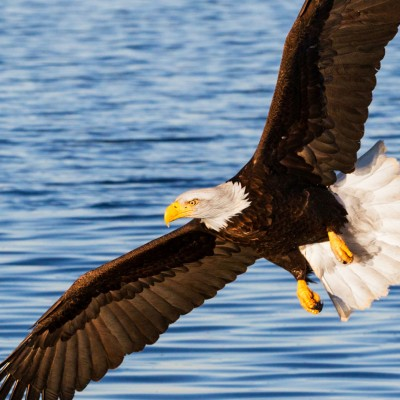

In [ ]:
cv2_imshow(im)

In [ ]:
# HEIGHT = 250
# WIDTH = 250
HEIGHT, WIDTH, _ = im.shape

In [ ]:
# r = np.random.randint(256, size=(HEIGHT,WIDTH)).astype(np.float32)
# g = np.random.randint(256, size=(HEIGHT,WIDTH)).astype(np.float32)
# b = np.random.randint(256, size=(HEIGHT,WIDTH)).astype(np.float32)
r = im[:,:,0].copy().astype(np.float32)
g = im[:,:,1].copy().astype(np.float32)
b = im[:,:,2].copy().astype(np.float32)

## **CUDA**

In [ ]:
mod = SourceModule("""
__global__ void rgb_to_yuv_cuda(float *y, float *u, float *v, float *r, float *g, float *b)
{
  int idx = blockIdx.x * gridDim.y + blockIdx.y;
  y[idx] =  0.257 * r[idx] + 0.504 * g[idx] + 0.098 * b[idx] +  16;
  u[idx] = -0.148 * r[idx] - 0.291 * g[idx] + 0.439 * b[idx] + 128;
  v[idx] =  0.439 * r[idx] - 0.368 * g[idx] - 0.071 * b[idx] + 128;
}
""")

rgb_to_yuv_cuda = mod.get_function("rgb_to_yuv_cuda")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The CUDA compiler succeeded, but said the following:
nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).

  if __name__ == '__main__':


In [ ]:
y_cuda = np.zeros_like(r)
u_cuda = np.zeros_like(g)
v_cuda = np.zeros_like(b)

In [ ]:
start = time.perf_counter()
rgb_to_yuv_cuda(
        drv.Out(y_cuda), drv.Out(u_cuda), drv.Out(v_cuda), 
        drv.In(r), drv.In(g), drv.In(b),
        block=(1,1,1), grid=(HEIGHT,WIDTH))
end = time.perf_counter()
print(end-start)

0.009757922000062536


In [ ]:
yuv_im = np.stack([y_cuda, u_cuda, v_cuda], axis=-1)

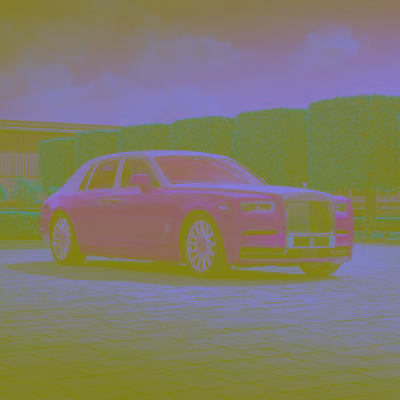

In [ ]:
cv2_imshow(yuv_im)

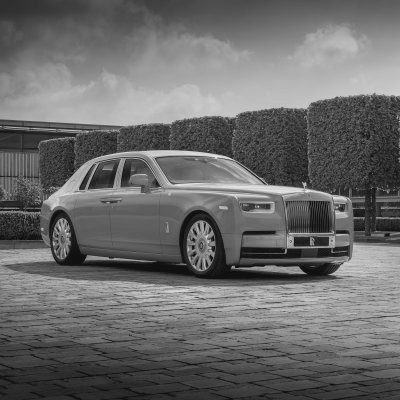

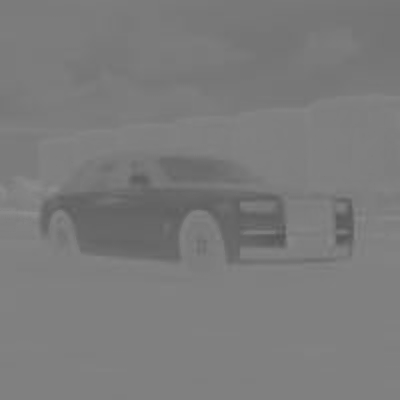

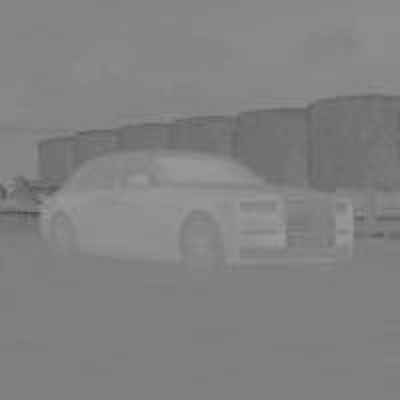

In [ ]:
cv2_imshow(y_cuda)
cv2_imshow(u_cuda)
cv2_imshow(v_cuda)

## **SEQUENTIAL**

In [ ]:
def rgb_to_yuv_sequential(y, u, v, r, g, b):
  for i in range(HEIGHT):
    for j in range(WIDTH):
      y[i][j] +=  0.257 * r[i][j] + 0.504 * g[i][j] + 0.098 * b[i][j] +  16
      u[i][j] += -0.148 * r[i][j] - 0.291 * g[i][j] + 0.439 * b[i][j] + 128
      v[i][j] +=  0.439 * r[i][j] - 0.368 * g[i][j] - 0.071 * b[i][j] + 128

In [ ]:
y_sequential = np.zeros_like(r)
u_sequential = np.zeros_like(g)
v_sequential = np.zeros_like(b)

In [ ]:
start = time.perf_counter()
rgb_to_yuv_sequential(y_sequential, u_sequential, v_sequential, r, g, b)
end = time.perf_counter()
print(end-start)

5.211557835999997


## **NUMPY**

In [ ]:
def rgb_to_yuv_numpy(y, u, v, r, g, b):
  y +=  0.257 * r + 0.504 * g + 0.098 * b +  16
  u += -0.148 * r - 0.291 * g + 0.439 * b + 128
  v +=  0.439 * r - 0.368 * g - 0.071 * b + 128

In [ ]:
y_numpy = np.zeros_like(r)
u_numpy = np.zeros_like(g)
v_numpy = np.zeros_like(b)

In [ ]:
start = time.perf_counter()
rgb_to_yuv_numpy(y_numpy, u_numpy, v_numpy, r, g, b)
end = time.perf_counter()
print(end-start)

0.01705847699986407


# **DA MINI PROJECT: TRAFFIC FORECASTING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
print(len(df))
df.head()

18288


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [ ]:
date_list = []
time_list = []
for dt in list(df['Datetime']):
  l = dt.split(' ')
  date_list.append(l[0])
  time_list.append(l[1])

In [ ]:
df['Date'] = date_list
df['Time'] = time_list

In [ ]:
train_df = df[['Date','Time','Count']].copy()

In [ ]:
train_df.head()

,Date,Time,Count
0,25-08-2012,00:00,8
1,25-08-2012,01:00,2
2,25-08-2012,02:00,6
3,25-08-2012,03:00,2
4,25-08-2012,04:00,2


In [ ]:
date_dict = {}
for i, d in enumerate(train_df['Date'].unique()):
  date_dict[d] = i

In [ ]:
time_dict = {}
for i, t in enumerate(train_df['Time'].unique()):
  time_dict[t] = i

In [ ]:
train_df['Date'] = [date_dict[i] for i in list(train_df['Date'])]
train_df['Time'] = [time_dict[i] for i in list(train_df['Time'])]

In [ ]:
train_df.head()

,Date,Time,Count
0,0,0,8
1,0,1,2
2,0,2,6
3,0,3,2
4,0,4,2


In [ ]:
train_df.tail()

,Date,Time,Count
18283,761,19,868
18284,761,20,732
18285,761,21,702
18286,761,22,580
18287,761,23,534


In [ ]:
X, y = np.array(train_df[['Date','Time']]), np.array(train_df['Count'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## **LINEAR REGRESSION**

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
print(f'MSE: {MSE}, RMSE: {np.sqrt(MSE)}')

MSE: 8003.837512540098, RMSE: 89.46416887525473


## **RIDGE**

In [ ]:
reg = Ridge(alpha=.5)
reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
print(f'MSE: {MSE}, RMSE: {np.sqrt(MSE)}')

MSE: 8003.837327757457, RMSE: 89.46416784253603


## **LASSO**

In [ ]:
reg = Lasso(alpha=.5)
reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
print(f'MSE: {MSE}, RMSE: {np.sqrt(MSE)}')

MSE: 8003.837327757457, RMSE: 89.46416784253603


## **TEST ON CONTEST DATASET**

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_date_list = []
test_time_list = []
for dt in list(test_df['Datetime']):
  l = dt.split(' ')
  test_date_list.append(l[0])
  test_time_list.append(l[1])

In [ ]:
test_df['Date'] = test_date_list
test_df['Time'] = test_time_list

In [ ]:
test_df.head()

,ID,Datetime,Date,Time
0,18288,26-09-2014 00:00,26-09-2014,00:00
1,18289,26-09-2014 01:00,26-09-2014,01:00
2,18290,26-09-2014 02:00,26-09-2014,02:00
3,18291,26-09-2014 03:00,26-09-2014,03:00
4,18292,26-09-2014 04:00,26-09-2014,04:00


In [ ]:
test_date_dict = {}
for i, d in enumerate(test_df['Date'].unique()):
  test_date_dict[d] = i

In [ ]:
test_df['Date_num'] = [test_date_dict[i] + len(date_dict) for i in list(test_df['Date'])]
test_df['Time_num'] = [time_dict[i] for i in list(test_df['Time'])]

In [ ]:
test_df.head()

,ID,Datetime,Date,Time,Date_num,Time_num
0,18288,26-09-2014 00:00,26-09-2014,00:00,762,0
1,18289,26-09-2014 01:00,26-09-2014,01:00,762,1
2,18290,26-09-2014 02:00,26-09-2014,02:00,762,2
3,18291,26-09-2014 03:00,26-09-2014,03:00,762,3
4,18292,26-09-2014 04:00,26-09-2014,04:00,762,4


In [ ]:
test_df.tail()

,ID,Datetime,Date,Time,Date_num,Time_num
5107,23395,26-04-2015 19:00,26-04-2015,19:00,974,19
5108,23396,26-04-2015 20:00,26-04-2015,20:00,974,20
5109,23397,26-04-2015 21:00,26-04-2015,21:00,974,21
5110,23398,26-04-2015 22:00,26-04-2015,22:00,974,22
5111,23399,26-04-2015 23:00,26-04-2015,23:00,974,23


In [ ]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [ ]:
y_pred = reg.predict(np.array(test_df[['Date_num','Time_num']]))

In [ ]:
test_df['Count'] = y_pred

In [ ]:
test_df.head()

,ID,Datetime,Date,Time,Date_num,Time_num,Count
0,18288,26-09-2014 00:00,26-09-2014,00:00,762,0,295.176896
1,18289,26-09-2014 01:00,26-09-2014,01:00,762,1,299.653346
2,18290,26-09-2014 02:00,26-09-2014,02:00,762,2,304.129796
3,18291,26-09-2014 03:00,26-09-2014,03:00,762,3,308.606245
4,18292,26-09-2014 04:00,26-09-2014,04:00,762,4,313.082695


In [ ]:
sub_df = test_df[['ID','Count']]
sub_df.head()

,ID,Count
0,18288,295.176896
1,18289,299.653346
2,18290,304.129796
3,18291,308.606245
4,18292,313.082695


In [ ]:
sub_df.to_csv('preds.csv', index=False)

# **AIR MINI PROJECT: TIC-TAC-TOE MINIMAX BOT**

In [ ]:
class Game:
  def __init__(self):
    self.board = [[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]]
    self.turn = 0
  
  def display(self):
    for i in range(3):
      for j in range(3):
        if self.board[i][j] == -1: print('_', end=' ')
        else:
          print('X',end=' ') if self.board[i][j] == 1 else print('O',end=' ')
      print()

  def is_valid(self, i, j):
    return self.board[i][j] == -1

  def no_moves(self):
    for i in range(3):
      for j in range(3):
        if self.board[i][j] == -1: return False
    return True

  def move(self, player, i, j):
    if self.board[i][j] == -1:
      self.board[i][j] = player
      return True
    return False

  def remove(self, player, i, j):
    if self.board[i][j] == player:
      self.board[i][j] = -1
      return True
    return False

  def winner(self):
    for i in range(3):
      if self.board[i][0] == self.board[i][1] and self.board[i][0] == self.board[i][2]:
        return self.board[i][0]
      elif self.board[0][i] == self.board[1][i] and self.board[2][i] == self.board[0][i]:
        return self.board[0][i]
    if self.board[0][0] == self.board[1][1] and self.board[1][1] == self.board[2][2]:
      return self.board[0][0]
    elif self.board[2][0] == self.board[1][1] and self.board[1][1] == self.board[0][2]:
      return self.board[1][1]
    return -1

In [ ]:
class Bot:
  def __init__(self, player):
    self.player = player
    self.board = Game()

  def value(self):
    if self.board.winner() == self.player: return 1
    elif self.board.winner() == 1 - self.player: return -1
    else: return 0

  def make_move(self):
    best_move = None
    max_val = -100
    for i in range(3):
      for j in range(3):
        if self.board.is_valid(i,j):
          self.board.move(self.player,i,j)
          if self.value() == 1 or self.board.no_moves():
            return (i,j)
          val = self.minimax(False)
          if val > max_val:
            best_move = (i,j)
            max_val = val
          self.board.remove(self.player,i,j)
    self.board.move(self.player, best_move[0], best_move[1])
    return best_move
  
  def minimax(self, maximizer):
    if maximizer:
      # best_move = None
      max_val = -100
      for i in range(3):
        for j in range(3):
          if self.board.is_valid(i,j):
            self.board.move(self.player,i,j)
            if self.value() == 1:
              self.board.remove(self.player,i,j)
              return 1
            elif self.board.no_moves():
              self.board.remove(self.player,i,j)
              return 0
            else:
              val = self.minimax(False)
              if val > max_val:
                max_val = val
                # best_move = (i,j)
            self.board.remove(self.player,i,j)
      return max_val

    else:
      min_val = 100
      for i in range(3):
        for j in range(3):
          if self.board.is_valid(i,j):
            self.board.move(1-self.player,i,j)
            if self.value() == -1:
              self.board.remove(1-self.player,i,j)
              return -1
            elif self.board.no_moves():
              self.board.remove(1-self.player,i,j)
              return 0
            else:
              val = self.minimax(True)
              if val < min_val:
                min_val = val
                # best_move = (i,j)
            self.board.remove(1-self.player,i,j)
      return min_val

  def opp_move(self, i, j):
    self.board.move(1 - self.player, i, j)

In [ ]:
bot = Bot(0)
game = Game()

In [ ]:
while not game.no_moves() and game.winner() == -1:
  move = bot.make_move()
  game.move(0, move[0], move[1])
  game.display()
  print()

  if game.winner() != -1:
    break
    
  my_move = input().split(',')
  i, j = int(my_move[0]), int(my_move[1])
  game.move(1, i, j)
  bot.opp_move(i, j)
  game.display()
  print()

O _ _ 
_ _ _ 
_ _ _ 

1,1
O _ _ 
_ X _ 
_ _ _ 

O O _ 
_ X _ 
_ _ _ 

2,0
O O _ 
_ X _ 
X _ _ 

O O O 
_ X _ 
X _ _ 



In [ ]:
game = Game()
bot = Bot(1)

In [ ]:
while not game.no_moves() and game.winner() == -1:
  my_move = input().split(',')
  i, j = int(my_move[0]), int(my_move[1])
  game.move(0, i, j)
  bot.opp_move(i, j)
  game.display()
  print()
  if game.winner() != -1 or game.no_moves():
    break

  move = bot.make_move()
  game.move(1, move[0], move[1])
  game.display()
  print()   

0,0
O _ _ 
_ _ _ 
_ _ _ 

O _ _ 
_ X _ 
_ _ _ 

2,2
O _ _ 
_ X _ 
_ _ O 

O X _ 
_ X _ 
_ _ O 

2,1
O X _ 
_ X _ 
_ O O 

O X _ 
_ X _ 
X O O 

0,2
O X O 
_ X _ 
X O O 

O X O 
_ X X 
X O O 

1,0
O X O 
O X X 
X O O 



TypeError: ignored

In [ ]:
#include <cmath>
#include <limits>
#include <vector>
#include <iostream>
#include <algorithm>
#include <tr1/random>

## sum the elements of v
double sum(const std::vector<double>& v)
{
  double sum = 0.0;
#pragma omp parallel for reduction(+:sum)
  for(size_t ii=0; ii< v.size(); ++ii)
    {
      sum += v[ii];
    }
  return sum;
}

// extract the minimum of v
double min(const std::vector<double>& v)
{
  double shared_min;
#pragma omp parallel 
  {
    double min = std::numeric_limits<double>::max();
#pragma omp for nowait
    for(size_t ii=0; ii<v.size(); ++ii)
      {
        min = std::min(v[ii], min);
      }
#pragma omp critical 
    {
      shared_min = std::min(shared_min, min);
    }
  }
  return shared_min;
}

// extract the minimum of v
double max(const std::vector<double>& v)
{
  double shared_max;
#pragma omp parallel 
  {
    double max = std::numeric_limits<double>::max();
#pragma omp for nowait
    for(size_t ii=0; ii<v.size(); ++ii)
      {
        max = std::max(v[ii], max);
      }
#pragma omp critical 
    {
      shared_max = std::max(shared_max, max);
    }
  }
  return shared_max;
}


// generate a random vector and use sum and min functions.
int main()
{
  using namespace std;
  using namespace std::tr1;

  std::tr1::mt19937 engine(time(0));
  std::tr1::uniform_real<> unigen(-1000.0,1000.0);
  std::tr1::variate_generator<std::tr1::mt19937, 
    std::tr1::uniform_real<> >gen(engine, unigen);

  std::vector<double> random(1000000);
  std::generate(random.begin(), random.end(), gen);

  cout << " Sum: " << sum(random) << " Mean: " << sum(random)/random.size()
       << " Min: " << min(random)  << " Max: " << max(random) << endl;

SyntaxError: ignored